# DAMG6105 Final Project

### Kaining Tian

### OverView

problem define: notes and questions

Melatonin supplements come in a wide range of doses (1mg, 3mg, 5mg, 10mg, 12mg, etc.) and product types (gummies, tablets, time-release), making the consumer market highly chaotic.
This project analyzes five different melatonin products scraped from Amazon to understand:

1. Do different dosages affect market feedback?
2. Is the feedback influenced more by other factors?
3. What do people expect for each dosage?
4. What are they praise\complain about for each dosage?

#### Reading the dataset

In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
raw_df1 = pd.read_csv("melatonin-amazon-1mg.csv",encoding = "ISO-8859-1")
raw_df2 = pd.read_csv("melatonin-amazon-3mg.csv",encoding = "ISO-8859-1")
raw_df3 = pd.read_csv("melatonin-amazon-5mg.csv",encoding = "ISO-8859-1")
raw_df4 = pd.read_csv("melatonin-amazon-10mg.csv",encoding = "ISO-8859-1")
raw_df5 = pd.read_csv("melatonin-amazon-12mg.csv",encoding = "ISO-8859-1")
raw_df6 = pd.read_csv("melatonin-amazon-20mg.csv",encoding = "ISO-8859-1")

In [8]:
raw_df = pd.concat([raw_df1, raw_df2, raw_df3, raw_df4, raw_df5, raw_df6],ignore_index=True)

#### Explore the dataset

In [10]:
raw_df.head(5)

ASIN   Brand HelpfulCounts Images  \
0  B07S5XBJV7  Natrol           169    NaN   
1  B07S5XBJV7  Natrol             6    NaN   
2  B07S5XBJV7  Natrol             2    NaN   
3  B07S5XBJV7  Natrol             7    NaN   
4  B07S5XBJV7  Natrol             1    NaN   

                                             PageUrl        ParentId  \
0  https://www.amazon.com/product-reviews/B07S5XB...   REXPKYSAA9MK4   
1  https://www.amazon.com/product-reviews/B07S5XB...   RRB1I75XPC9YR   
2  https://www.amazon.com/product-reviews/B07S5XB...  R2N9V68KO8YQEN   
3  https://www.amazon.com/product-reviews/B07S5XB...  R1AD63KS98B5QM   
4  https://www.amazon.com/product-reviews/B07S5XB...  R3ABDA16IHCZA7   

                            ProductLink  \
0  https://www.amazon.com/dp/B07S5XBJV7   
1  https://www.amazon.com/dp/B07S5XBJV7   
2  https://www.amazon.com/dp/B07S5XBJV7   
3  https://www.amazon.com/dp/B07S5XBJV7   
4  https://www.amazon.com/dp/B07S5XBJV7   

                                        ProductTitle  \
0  Natrol Fast Dissolve Melatonin 1 mg, Melatonin...   
1  Natrol Fast Dissolve Melatonin 1 mg, Melatonin...   
2  Natrol Fast Dissolve Melatonin 1 mg, Melatonin...   
3  Natrol Fast Dissolve Melatonin 1 mg, Melatonin...   
4  Natrol Fast Dissolve Melatonin 1 mg, Melatonin...   

                                       ReviewContent          ReviewDate  \
0  I'm 40, but have been dealing with sleep probl...      April 18, 2023   
1  Fast acting. Great tasting.  No nightmares.  I...  September 14, 2024   
2  They dissolve easily, taste good, and are effe...    November 1, 2024   
3  This is great for helping me or my kiddo fall ...   September 4, 2024   
4  Dose provides assistance in obtaining quality ...    October 12, 2024   

   ReviewScore                                        ReviewTitle  \
0          5.0               Really tasty AND effective sleep aid   
1          5.0                       The best melatonin out there   
2          5.0  Really helpful on those nights that sleep just...   
3          5.0                                  Love the low dose   
4          4.0                      1 mg dose is highly effective   

        Reviewer  Verified  
0          Keith      True  
1          Amber      True  
2      Brandon W      True  
3  Amy Katharine      True  
4    T. Thompson      True

In [11]:
raw_df.columns

Index(['ASIN', 'Brand', 'HelpfulCounts', 'Images', 'PageUrl', 'ParentId',
       'ProductLink', 'ProductTitle', 'ReviewContent', 'ReviewDate',
       'ReviewScore', 'ReviewTitle', 'Reviewer', 'Verified'],
      dtype='object')

In [12]:
raw_df.shape

(32791, 14)

In [13]:
raw_df.size 

459074

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32791 entries, 0 to 32790
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           32791 non-null  object 
 1   Brand          32791 non-null  object 
 2   HelpfulCounts  32791 non-null  object 
 3   Images         6623 non-null   object 
 4   PageUrl        32791 non-null  object 
 5   ParentId       32791 non-null  object 
 6   ProductLink    32791 non-null  object 
 7   ProductTitle   32791 non-null  object 
 8   ReviewContent  32435 non-null  object 
 9   ReviewDate     32791 non-null  object 
 10  ReviewScore    32791 non-null  float64
 11  ReviewTitle    32721 non-null  object 
 12  Reviewer       32787 non-null  object 
 13  Verified       32791 non-null  bool   
dtypes: bool(1), float64(1), object(12)
memory usage: 3.3+ MB


In [15]:
raw_df.isnull().sum().sum() 

26598

In [16]:
raw_df['ASIN'].nunique() 

6

### Data Cleaning

#### Title Parsing

In [19]:
import re

Dosage

In [21]:
raw_df["Dosage_mg"] = raw_df["ProductTitle"].str.extract(
    r'(?<!\d)(\d+)\s*mg(?!/)', expand=False
).astype(float)

Form

In [23]:
raw_df["Form"] = raw_df["ProductTitle"].str.lower().str.extract(
    r'(gummy|gummies|fast dissolve|quick dissolve|tablets?|capsules?)',
    expand=False
)

Flavor

In [25]:
raw_df["Flavor"] = raw_df["ProductTitle"].str.extract(
    r'(strawberry|mixed berry|natural berry|blackberry|berry|lemon|orange|citrus|cherry|blueberry)',
    flags=re.IGNORECASE,
    expand=False
)

Count

In [27]:
p1 = raw_df["ProductTitle"].str.extract(
    r'(\d+)\s*(?:count|tablets?)',
    flags=re.IGNORECASE
)

p2 = raw_df["ProductTitle"].str.extract(
    r'(\d+)\s*(?:\w+\s+)*tablets',
    flags=re.IGNORECASE
)

p3 = raw_df["ProductTitle"].str.extract(
    r'(\d+)\s*day supply',
    flags=re.IGNORECASE
)

raw_df["Count"] = p1.fillna(p2).fillna(p3).astype(float)

#### check data type

In [29]:
raw_df["HelpfulCounts"].dtype

dtype('O')

In [30]:
raw_df["HelpfulCounts"] = pd.to_numeric(raw_df["HelpfulCounts"], errors="coerce")

In [31]:
raw_df["ReviewDate"].dtype

dtype('O')

In [32]:
raw_df['ReviewDate'] = pd.to_datetime(raw_df['ReviewDate'], errors='coerce')

#### Missing values

In [34]:
raw_df.isnull().sum()

ASIN                 0
Brand                0
HelpfulCounts       22
Images           26168
PageUrl              0
ParentId             0
ProductLink          0
ProductTitle         0
ReviewContent      356
ReviewDate          60
ReviewScore          0
ReviewTitle         70
Reviewer             4
Verified             0
Dosage_mg            0
Form                 0
Flavor               0
Count                0
dtype: int64

need deal with HelpfulCounts, Images, ReviewContent, ReviewTitle, Reviewer

HelpfulCounts fill 0, means no one comment

In [37]:
raw_df['HelpfulCounts'] = raw_df['HelpfulCounts'].fillna(0)

Images not used so drop 

In [39]:
raw_df = raw_df.drop(columns=['Images'])

dop the ones with no comment, because this is core data

In [41]:
raw_df = raw_df[raw_df['ReviewContent'].notna()]

not important, fill with empty string

In [43]:
raw_df['ReviewTitle'] = raw_df['ReviewTitle'].fillna('')

In [44]:
raw_df['Reviewer'] = raw_df['Reviewer'].fillna('')

In [45]:
raw_df.isnull().sum()

ASIN              0
Brand             0
HelpfulCounts     0
PageUrl           0
ParentId          0
ProductLink       0
ProductTitle      0
ReviewContent     0
ReviewDate       60
ReviewScore       0
ReviewTitle       0
Reviewer          0
Verified          0
Dosage_mg         0
Form              0
Flavor            0
Count             0
dtype: int64

#### Data Reduction

In [47]:
df_clean = raw_df[raw_df['Verified'] == True].copy()
df_clean.drop(["PageUrl","ParentId","ProductLink","ProductTitle","Reviewer","Verified"],axis=1,inplace=True)

In [48]:
df_clean.head()

ASIN   Brand  HelpfulCounts  \
0  B07S5XBJV7  Natrol          169.0   
1  B07S5XBJV7  Natrol            6.0   
2  B07S5XBJV7  Natrol            2.0   
3  B07S5XBJV7  Natrol            7.0   
4  B07S5XBJV7  Natrol            1.0   

                                       ReviewContent ReviewDate  ReviewScore  \
0  I'm 40, but have been dealing with sleep probl... 2023-04-18          5.0   
1  Fast acting. Great tasting.  No nightmares.  I... 2024-09-14          5.0   
2  They dissolve easily, taste good, and are effe... 2024-11-01          5.0   
3  This is great for helping me or my kiddo fall ... 2024-09-04          5.0   
4  Dose provides assistance in obtaining quality ... 2024-10-12          4.0   

                                         ReviewTitle  Dosage_mg  \
0               Really tasty AND effective sleep aid        1.0   
1                       The best melatonin out there        1.0   
2  Really helpful on those nights that sleep just...        1.0   
3                                  Love the low dose        1.0   
4                      1 mg dose is highly effective        1.0   

            Form      Flavor  Count  
0  fast dissolve  Strawberry  200.0  
1  fast dissolve  Strawberry  200.0  
2  fast dissolve  Strawberry  200.0  
3  fast dissolve  Strawberry  200.0  
4  fast dissolve  Strawberry  200.0

### Analyzing the data

### 2.3 Univariate analysis

quantitive data: HelpfulCounts/ReviewScore/Dosage_mg/Count

In [52]:
df_clean.describe()

HelpfulCounts                     ReviewDate   ReviewScore  \
count   32017.000000                          31957  32017.000000   
mean        2.079926  2023-03-05 08:07:44.123666432      3.346785   
min         0.000000            2009-10-27 00:00:00      1.000000   
25%         0.000000            2022-03-31 00:00:00      2.000000   
50%         0.000000            2023-10-05 00:00:00      4.000000   
75%         1.000000            2024-07-04 00:00:00      5.000000   
max       720.000000            2024-11-13 00:00:00      5.000000   
std        14.410562                            NaN      1.609068   

          Dosage_mg         Count  
count  32017.000000  32017.000000  
mean      10.041103    151.583534  
min        1.000000     70.000000  
25%        5.000000    100.000000  
50%       10.000000    180.000000  
75%       12.000000    180.000000  
max       20.000000    200.000000  
std        5.830550     41.335358

conclusions:
1. HelpfulCounts(std, max-min, 75%) --> data have extreme big values, A few comments attract a lot of attention, while the majority of comments receive no attention.
2. ReviewScore(50%, mean) --> The median (4) is high, and the mean (3.3) is also high.
3. Dosage(mean, 50%) --> mediam dosage have more comments
4. Count(Mean, 50%, 75%) --> bigger package have more comments

visulization provement

HelpfulCounts

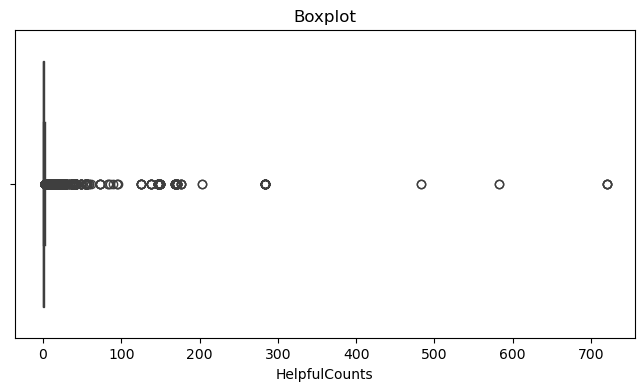

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['HelpfulCounts'])
plt.title("Boxplot")
plt.show()

ReviewScore

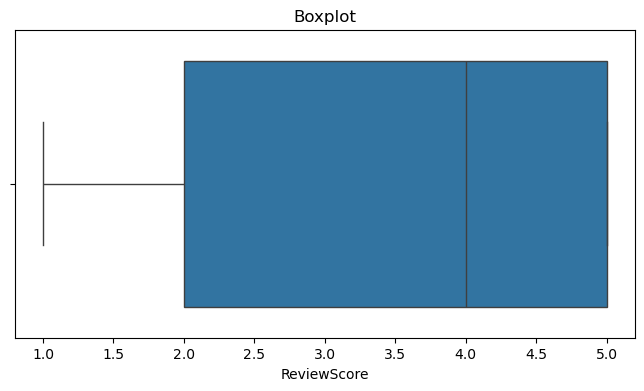

In [58]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['ReviewScore'])
plt.title("Boxplot")
plt.show()

Dosage

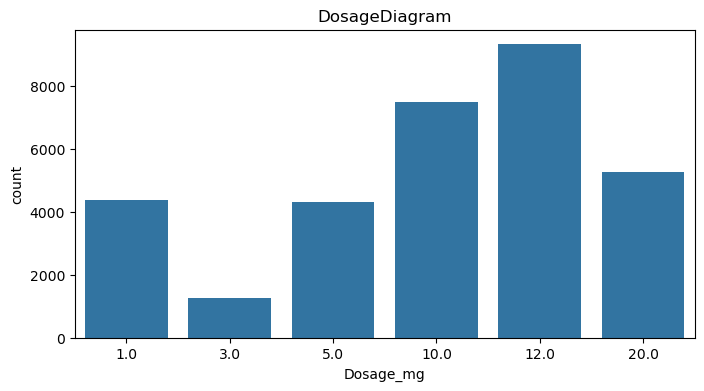

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_clean['Dosage_mg'])
plt.title("DosageDiagram")
plt.show()

count

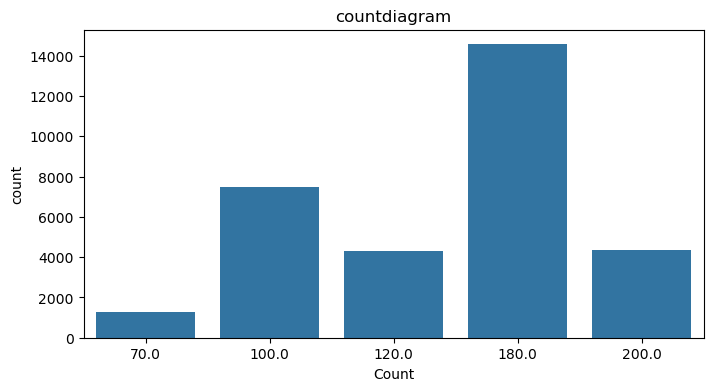

In [62]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_clean['Count'])
plt.title("countdiagram")
plt.show()

Categorical data: Brand / Form / Flavor

<Axes: xlabel='Brand', ylabel='count'>

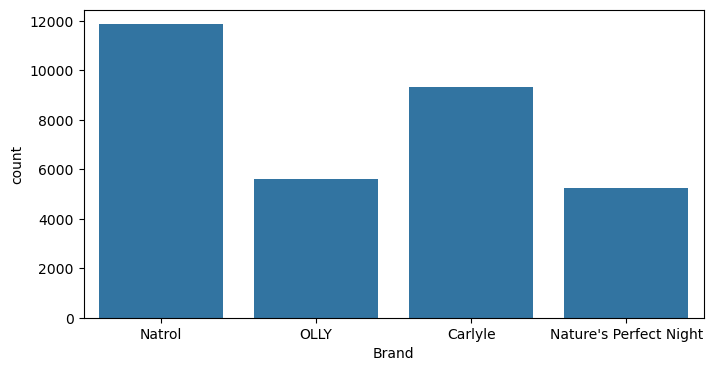

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='Brand', data=df_clean)

<Axes: xlabel='Form', ylabel='count'>

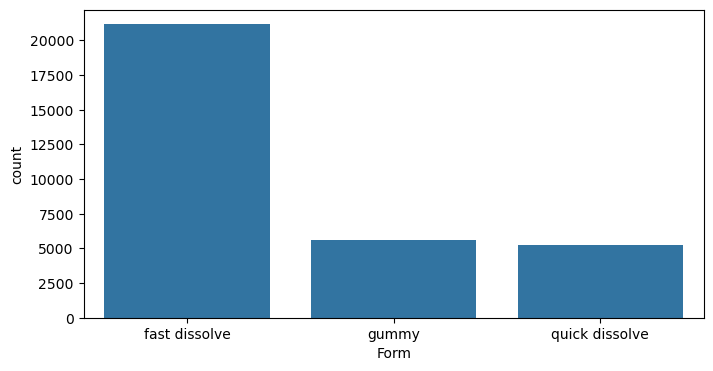

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(x='Form', data=df_clean)

<Axes: xlabel='Flavor', ylabel='count'>

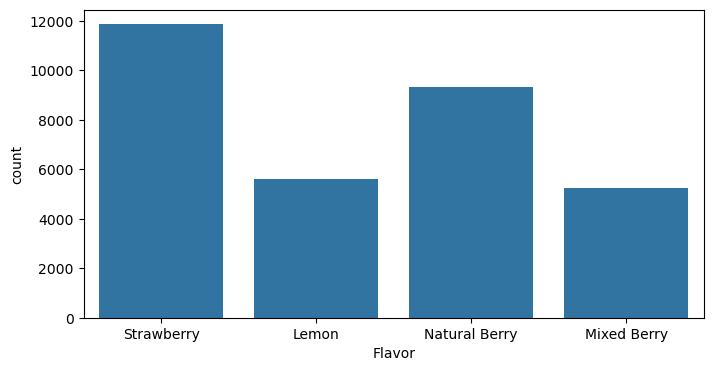

In [66]:
plt.figure(figsize=(8,4))
sns.countplot(x='Flavor', data=df_clean)

medium dosage\big package\dissolve form have more reviews


### 2.4 Bivariate analysis

Dosage vs ReviewScore

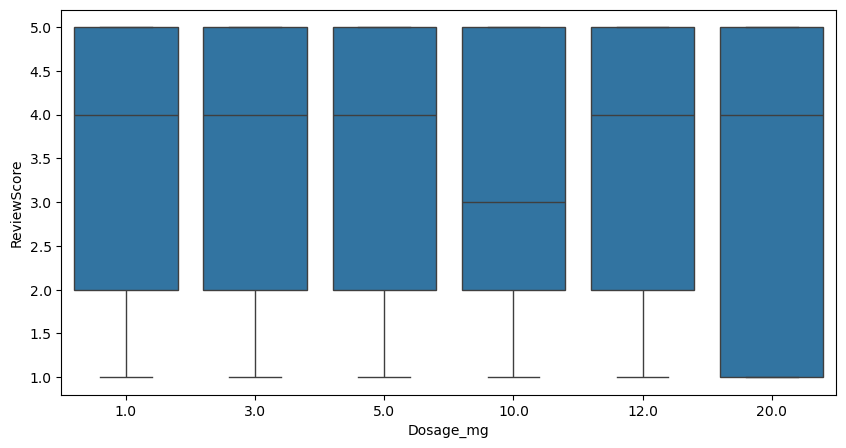

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Dosage_mg', y='ReviewScore', data=df_clean)
plt.show()

<Axes: xlabel='Dosage_mg', ylabel='ReviewScore'>

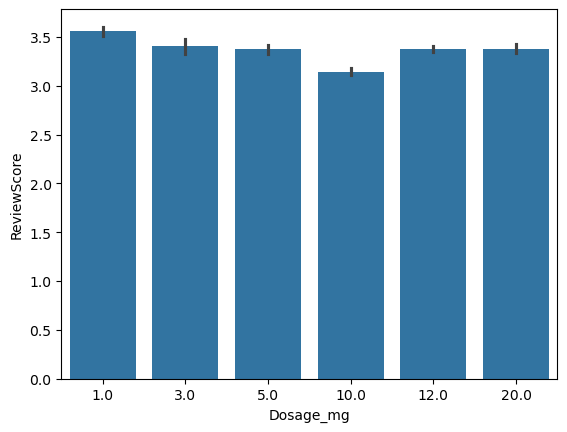

In [71]:
sns.barplot(x='Dosage_mg', y='ReviewScore', data=df_clean)

ReviewScore vs Count

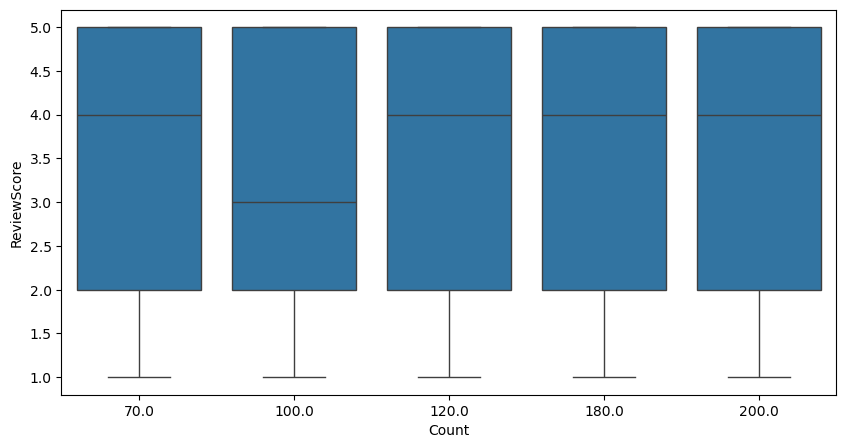

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Count', y='ReviewScore', data=df_clean)
plt.show()

<Axes: xlabel='Count', ylabel='ReviewScore'>

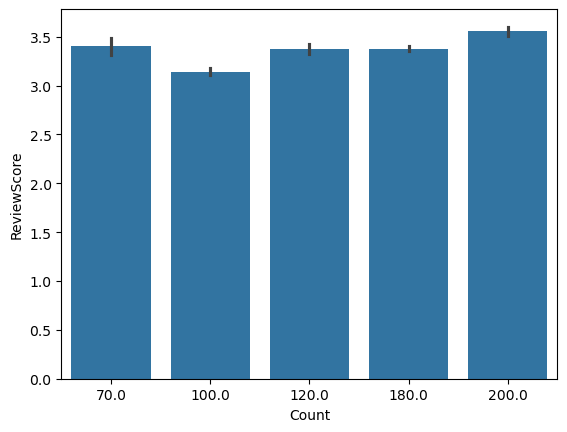

In [74]:
sns.barplot(x='Count', y='ReviewScore', data=df_clean)

ReviewScore vs Form

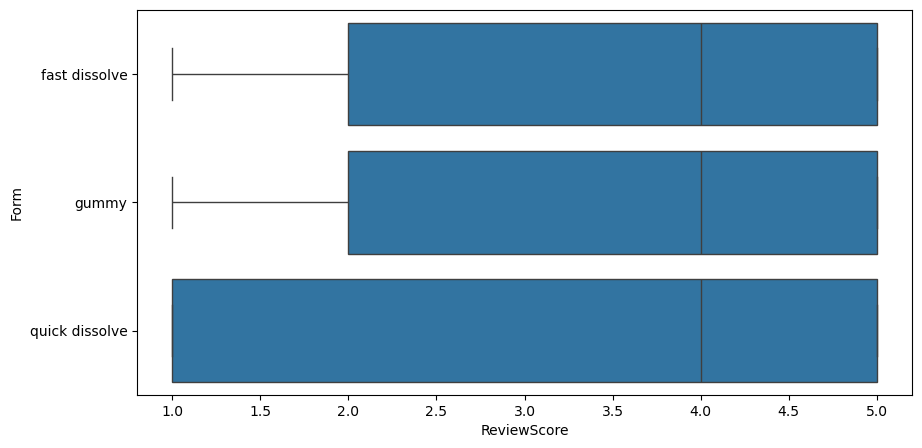

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ReviewScore', y='Form', data=df_clean)
plt.show()

<Axes: xlabel='Form', ylabel='ReviewScore'>

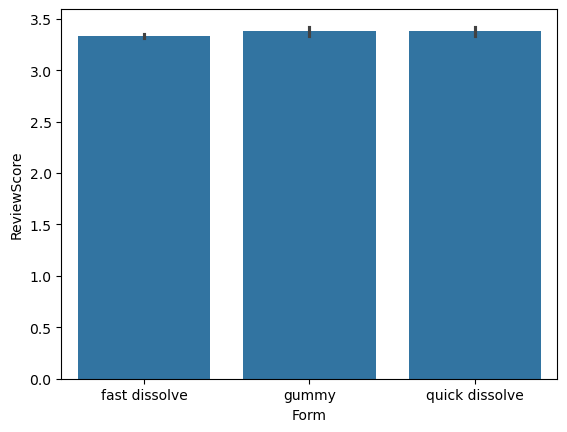

In [77]:
sns.barplot(x='Form', y='ReviewScore', data=df_clean)

ReviewScore vs Brand

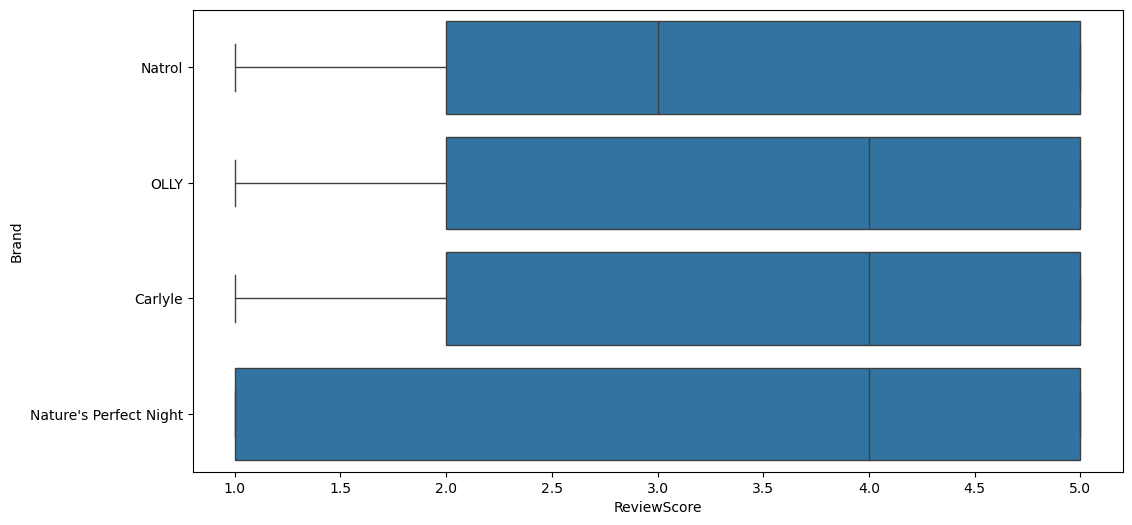

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ReviewScore', y='Brand', data=df_clean)
plt.show()

<Axes: xlabel='Brand', ylabel='ReviewScore'>

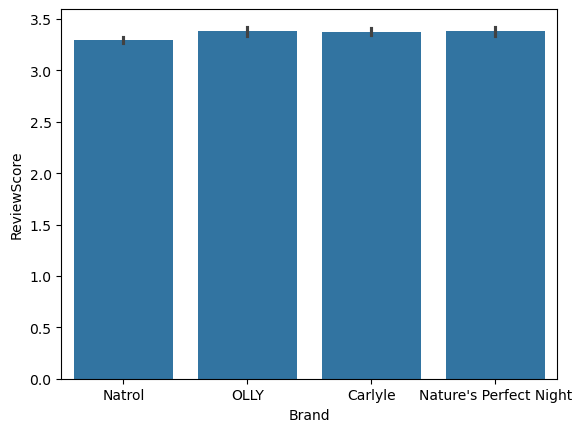

In [80]:
sns.barplot(x='Brand', y='ReviewScore', data=df_clean)

ReviewScore vs Flavor

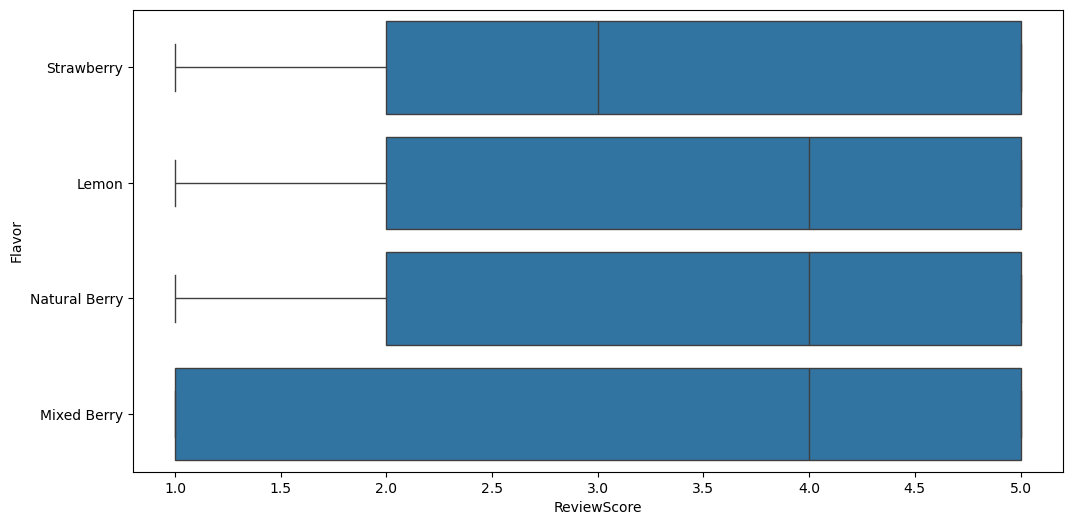

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ReviewScore', y='Flavor', data=df_clean)
plt.show()

<Axes: xlabel='Flavor', ylabel='ReviewScore'>

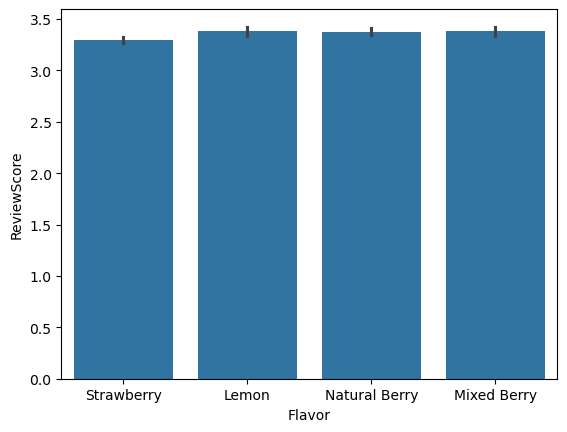

In [83]:
sns.barplot(x='Flavor', y='ReviewScore', data=df_clean)

low_score_ratio

1. ReviewScore is not strongly affected by any of these factors
3. medium dosage have the lowest reviewScore.
4. medium package(count) have the lowest reviewScore.
5. flavor brand and form don't have big difference

### 2.5 Multivariate analysis

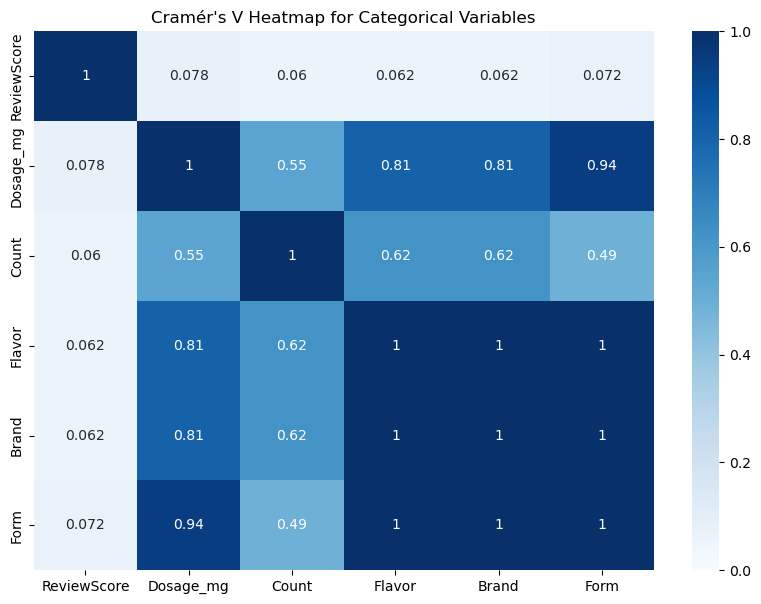

In [87]:
import scipy.stats as ss

# Cramér's V function
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# Variables you want to test
cols = ['ReviewScore','Dosage_mg','Count',"Flavor","Brand","Form"]

# Build the Cramér matrix
cramer_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), 
                             index=cols, columns=cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        x = df_clean[cols[i]]
        y = df_clean[cols[j]]
        # For numerical variables, discretize or treat as categories
        if x.dtype != 'object' and not pd.api.types.is_categorical_dtype(x):
            x = pd.cut(x, bins=5)  # discretize continuous vars
        if y.dtype != 'object' and not pd.api.types.is_categorical_dtype(y):
            y = pd.cut(y, bins=5)
        cramer_matrix.iloc[i, j] = cramers_v(x, y)

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cramer_matrix, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()


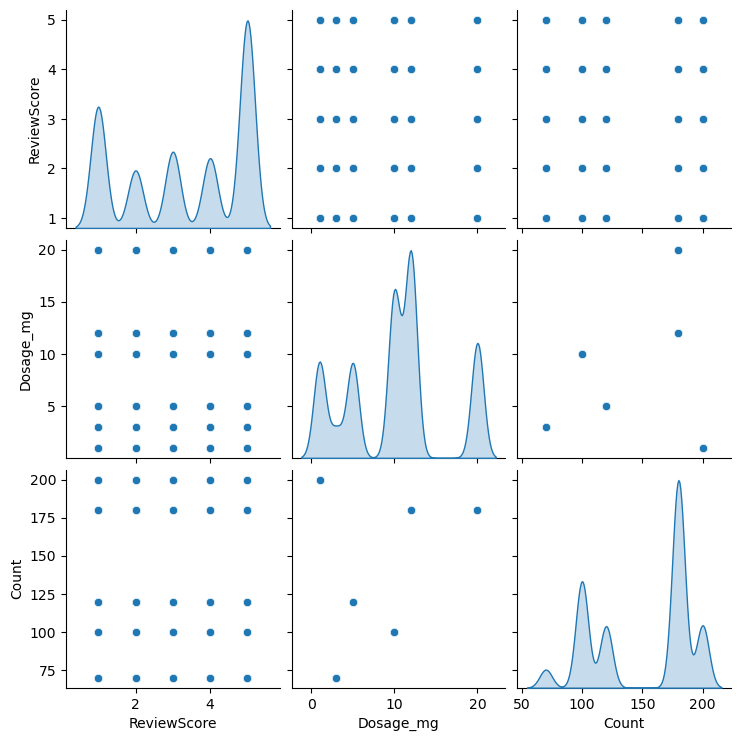

In [88]:
sns.pairplot(df_clean[['ReviewScore','Dosage_mg','Count',"Flavor","Brand","Form"]], diag_kind='kde')

1. ReviewScore is not very strongly relevant to any of the factors.
2. Form and brand have a strong influence on flavor.

conclusion:
1. ReviewScore is related to not only truth but also expectation, which can be different(eg.people buy low dose product expact the effect to be slight)
2. Is ReviewScore influenced by other people's opinion(high HelpfulCounts review)?
3. all the ReviewScore is relatively high, probably part of the advertisement plan

In [91]:
df_clean[df_clean['HelpfulCounts'] > 5]['ReviewScore'].value_counts(normalize=True)

ReviewScore
5.0    0.518286
4.0    0.236677
1.0    0.179728
3.0    0.055904
2.0    0.009404
Name: proportion, dtype: float64

In [323]:
df_clean[df_clean['HelpfulCounts'] <= 5]['ReviewScore'].value_counts(normalize=True)

ReviewScore
5.0    0.381557
1.0    0.230841
3.0    0.148822
4.0    0.124340
2.0    0.114440
Name: proportion, dtype: float64

high HelpfulCounts review have high ReviewScore
1. Helpful > 5: Higher percentage of high scores
2. Helpful ≤ 5: Significantly higher percentage of low-score ratings

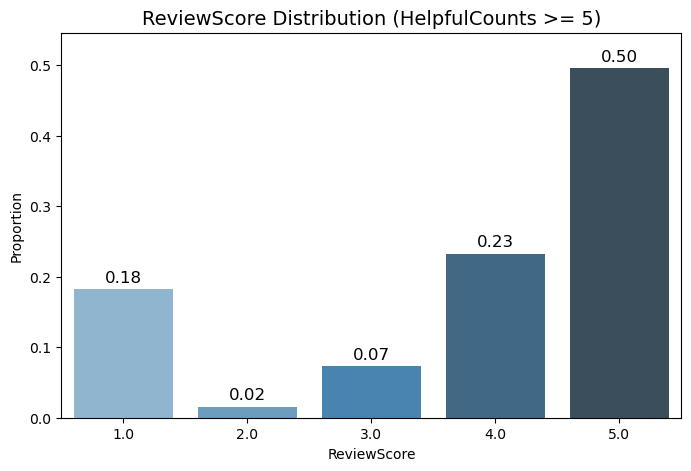

In [331]:
# Get normalized score distribution
score_dist = df_clean[df_clean['HelpfulCounts'] >= 5]['ReviewScore'].value_counts(normalize=True)

score_dist = score_dist.sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=score_dist.index, y=score_dist.values, palette="Blues_d")

plt.title("ReviewScore Distribution (HelpfulCounts >= 5)", fontsize=14)
plt.xlabel("ReviewScore")
plt.ylabel("Proportion")

for i, v in enumerate(score_dist.values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.ylim(0, max(score_dist.values) + 0.05)
plt.show()

In [94]:
df_prod = df_clean.groupby('ASIN').agg(
    avg_score=('ReviewScore', 'mean'),
    median_score=('ReviewScore', 'median'),
    q25_score=('ReviewScore', lambda x: x.quantile(0.25)),
    q75_score=('ReviewScore', lambda x: x.quantile(0.75)),
    std_score=('ReviewScore', 'std'),

    high_helpful_count=('HelpfulCounts', lambda x: (x > 5).sum()),
    max_helpful=('HelpfulCounts', 'max'),
    total_reviews=('ReviewScore', 'count')
).reset_index()

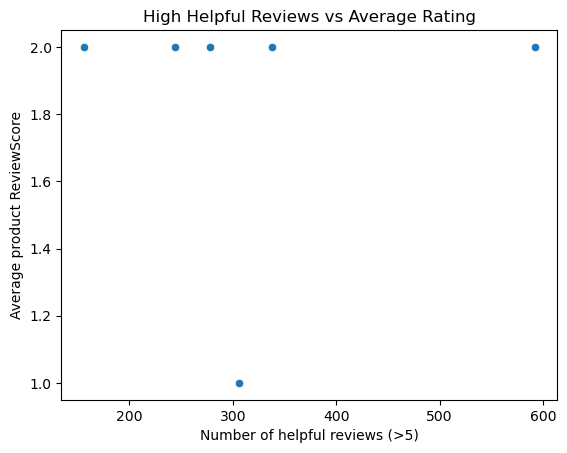

In [95]:
sns.scatterplot(x='high_helpful_count', y='q25_score', data=df_prod)
plt.xlabel("Number of helpful reviews (>5)")
plt.ylabel("Average product ReviewScore")
plt.title("High Helpful Reviews vs Average Rating")
plt.show()

There is almost no correlation between a high number of helpful reviews and the average product rating.

In [97]:
df_prod['max_helpful'] = df_prod['max_helpful']

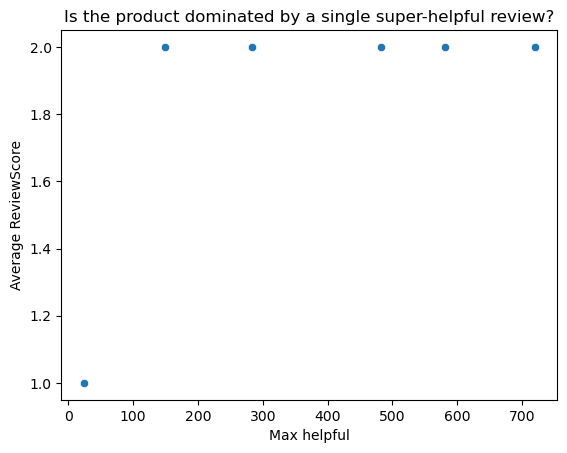

In [98]:
sns.scatterplot(x='max_helpful', y='q25_score', data=df_prod)
plt.xlabel("Max helpful")
plt.ylabel("Average ReviewScore")
plt.title("Is the product dominated by a single super-helpful review?")
plt.show()

A single "viral comment" will not affect everyone's rating attitude.

In [100]:
df_clean.groupby("ASIN")["ReviewScore"].describe()

count      mean       std  min  25%  50%  75%  max
ASIN                                                           
B01E14X7SM  7476.0  3.140984  1.573246  1.0  2.0  3.0  5.0  5.0
B07GR9WBFY  9307.0  3.375524  1.566512  1.0  2.0  4.0  5.0  5.0
B07H8NZZJB  1273.0  3.401414  1.502063  1.0  2.0  4.0  5.0  5.0
B07S5XBJV7  4378.0  3.557789  1.590746  1.0  2.0  4.0  5.0  5.0
B099NXYT69  5262.0  3.378753  1.687085  1.0  1.0  4.0  5.0  5.0
B09S3F7YSY  4321.0  3.372136  1.673846  1.0  2.0  4.0  5.0  5.0

find that all products share virtually identical score structures:
ReviewScore does not meaningfully differentiate products

conclusion for nlp:
1. Product review is not strongly affected by product attributes or even advertisement.
2. All products have both positive and negative reviews, but the overall rating is high.
3. Each product has a significant number of negative experiences
4. but these negative experiences don't lower the average rating (because there are too many 4-5 star reviews).
5. The rating reflects the user's subjective experience, expectations, current emotions, and individual differences.

next step: 
1. find different expectations for different dosage
2. separate review with score and see how the expectations meet\ missed
3. find out whether the high HelpfulCounts review influence the whole review?

### NLP

#### 3.1Normalization

In [105]:
comment = df_clean.copy()

In [106]:
import re

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

In [107]:
comment['ReviewContent'] = comment['ReviewContent'].apply(clean_text)

In [108]:
def allclean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

In [109]:
comment['ReviewContent'] = comment['ReviewContent'].apply(allclean)

In [110]:
comment['ReviewContent']

0        i m 40  but have been dealing with sleep probl...
1        fast acting  great tasting   no nightmares   i...
2        they dissolve easily  taste good  and are effe...
3        this is great for helping me or my kiddo fall ...
4        dose provides assistance in obtaining quality ...
                               ...                        
32786    after using these for only a few days i broke ...
32787    i just opened the bottle to find more than hal...
32788                            recieved damaged product 
32789    flavor was good  easy to use   just did not wo...
32790                          pill bottle seal was broken
Name: ReviewContent, Length: 32017, dtype: object

In [111]:
raw_freq = pd.Series(' '.join(comment['ReviewContent']).split()).value_counts()
raw_freq

i             68933
the           46175
and           36938
to            34539
it            29692
              ...  
structure         1
compatible        1
bewarethe         1
carpal            1
fortunate         1
Name: count, Length: 7291, dtype: int64

#### Stop Words Removal

In [113]:
stop = pd.read_csv('stop_w.txt', encoding = "ISO-8859-1")
stop.head()

stops
0     i
1    me
2    my
3   you
4    it

In [114]:
stop = stop['stops'].astype(str).str.strip().tolist()

In [115]:
comment['ReviewContent'] = comment['ReviewContent'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [116]:
comment['ReviewContent']

0        40 dealing sleep problems 14 sleep disorder me...
1        fast acting great tasting nightmares works goo...
2        dissolve easily taste good effective nice 1mg ...
3        great helping kiddo fall asleep easily break h...
4        dose assistance obtaining quality sleep higher...
                               ...                        
32786                              days broke hives refund
32787    opened bottle half pills crushed unusable phot...
32788                             recieved damaged product
32789    flavor good easy work 20mg brand brand 10mg works
32790                              pill bottle seal broken
Name: ReviewContent, Length: 32017, dtype: object

In [117]:
freq_cleaned = pd.Series(' '.join(comment['ReviewContent']).split()).value_counts()[:20]
freq_cleaned

sleep        15158
melatonin     9053
taste         7717
product       7259
asleep        6632
work          6529
night         6439
good          5313
works         4937
great         4617
taking        4392
bottle        4184
time          3936
flavor        3600
fall          3364
brand         3292
mg            3255
gummies       3076
pills         2977
dissolve      2967
Name: count, dtype: int64

In [118]:
comment.head()

ASIN   Brand  HelpfulCounts  \
0  B07S5XBJV7  Natrol          169.0   
1  B07S5XBJV7  Natrol            6.0   
2  B07S5XBJV7  Natrol            2.0   
3  B07S5XBJV7  Natrol            7.0   
4  B07S5XBJV7  Natrol            1.0   

                                       ReviewContent ReviewDate  ReviewScore  \
0  40 dealing sleep problems 14 sleep disorder me... 2023-04-18          5.0   
1  fast acting great tasting nightmares works goo... 2024-09-14          5.0   
2  dissolve easily taste good effective nice 1mg ... 2024-11-01          5.0   
3  great helping kiddo fall asleep easily break h... 2024-09-04          5.0   
4  dose assistance obtaining quality sleep higher... 2024-10-12          4.0   

                                         ReviewTitle  Dosage_mg  \
0               Really tasty AND effective sleep aid        1.0   
1                       The best melatonin out there        1.0   
2  Really helpful on those nights that sleep just...        1.0   
3                                  Love the low dose        1.0   
4                      1 mg dose is highly effective        1.0   

            Form      Flavor  Count  
0  fast dissolve  Strawberry  200.0  
1  fast dissolve  Strawberry  200.0  
2  fast dissolve  Strawberry  200.0  
3  fast dissolve  Strawberry  200.0  
4  fast dissolve  Strawberry  200.0

#### Tokenization, Counting and Normalizing the tokens

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(min_df = 1, max_df = 0.9)
X = cvect.fit_transform(comment['ReviewContent'])

In [121]:
word_freq_df = pd.DataFrame({'term': cvect.get_feature_names_out(), 
                             'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [122]:
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [123]:
word_freq_df

term  occurrences  frequency
0           00          109   0.000224
1          000            8   0.000016
2           03            1   0.000002
3           04           34   0.000070
4         0425           12   0.000025
...        ...          ...        ...
6792       zzz           25   0.000051
6793   zzzquil           43   0.000088
6794      zzzz            4   0.000008
6795   zzzzzzz           12   0.000025
6796  zzzzzzzz            4   0.000008

[6797 rows x 3 columns]

In [124]:
word_freq_df.sort_values('occurrences', ascending = False).head(20)

term  occurrences  frequency
5499      sleep        15158   0.031168
3779  melatonin         9053   0.018615
6009      taste         7717   0.015868
4672    product         7259   0.014926
595      asleep         6632   0.013637
6678       work         6529   0.013425
4050      night         6439   0.013240
2736       good         5313   0.010925
6687      works         4937   0.010152
2781      great         4617   0.009494
5986     taking         4392   0.009031
901      bottle         4184   0.008603
6133       time         3936   0.008093
2511     flavor         3600   0.007402
2399       fall         3364   0.006917
922       brand         3292   0.006769
3831         mg         3255   0.006693
2816    gummies         3076   0.006325
4459      pills         2977   0.006121
1905   dissolve         2967   0.006101

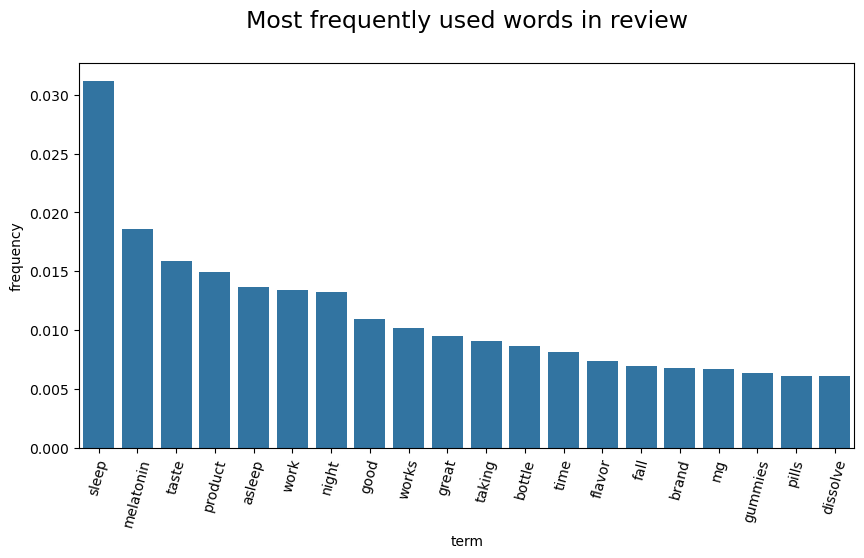

In [125]:
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20])
plot.set_xticklabels(rotation=75, labels = word_freq_df.sort_values('frequency', ascending=False).term[0:20])
plt.title("Most frequently used words in review", y = 1.07, fontsize = 17);

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvect = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
doc_vec = tvect.fit_transform(comment['ReviewContent'])
names_features = tvect.get_feature_names_out()

In [127]:
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

#### N-grams

In [129]:
#Bi-gram
def top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [130]:
# n2
top2_words = top_n2_words(comment['ReviewContent'], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0      fall asleep  2973
1      stay asleep  1106
2        sleep aid   889
3       taste good   833
4       30 minutes   767
..             ...   ...
195   flavor great   115
196      work fine   115
197   hours taking   115
198  asleep longer   114
199      toss turn   114

[200 rows x 2 columns]

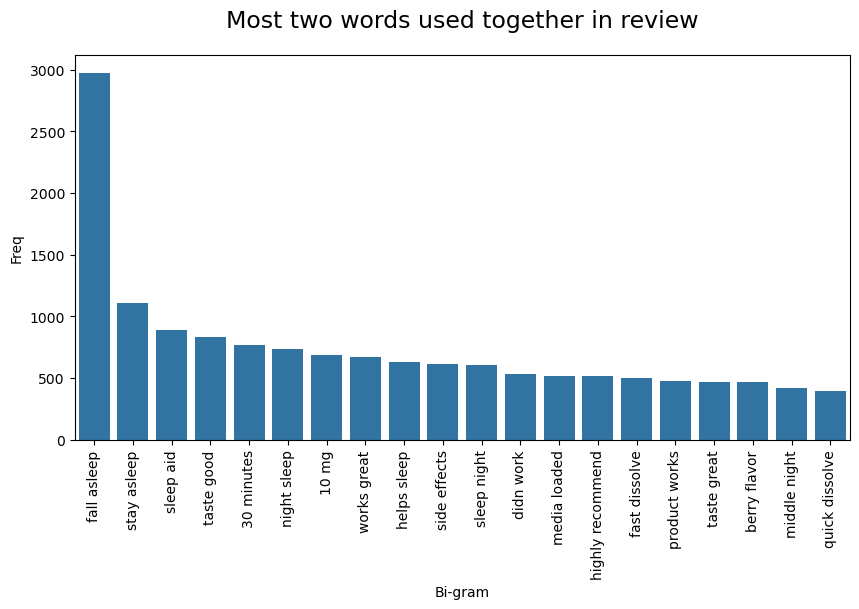

In [131]:
top20_bi_gram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bi_gram["Bi-gram"],y=top20_bi_gram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bi_gram["Bi-gram"])
plt.title("Most two words used together in review", y=1.05, fontsize=17);

In [132]:
def top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [133]:
top3_words = top_n3_words(comment['ReviewContent'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [134]:
top3_df

Tri-gram  Freq
0         helps fall asleep   371
1          good night sleep   315
2        asleep stay asleep   308
3          fall asleep stay   290
4        fall asleep faster   234
..                      ...   ...
195          drug free free    48
196        free free common    48
197        free common food    48
198   common food allergens    48
199  food allergens tablets    48

[200 rows x 2 columns]

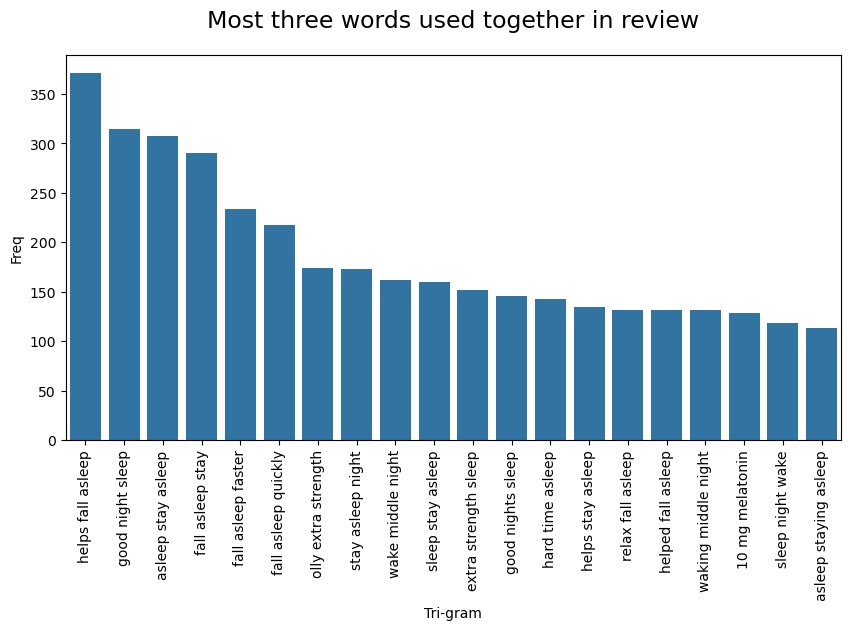

In [135]:
import seaborn as sns
top20_tri_gram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_tri_gram["Tri-gram"],y=top20_tri_gram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_tri_gram["Tri-gram"])
plt.title("Most three words used together in review", y=1.05, fontsize=17);

#### WordCloud for entire corpus

In [137]:
str_Total = " ".join(comment['ReviewContent'])

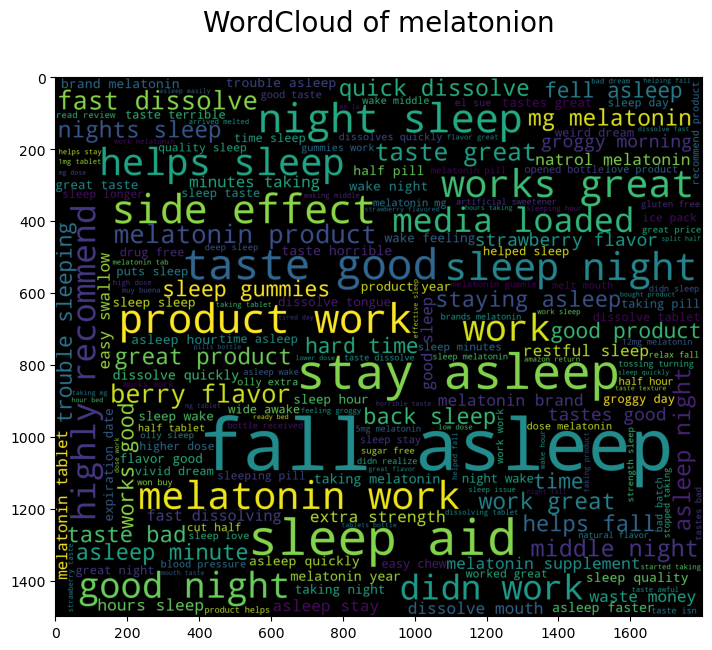

In [138]:
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(str_Total)
plt.imshow(wordcloud_stw)
plt.title("WordCloud of melatonion", y=1.07, fontsize=20);

Users expectations:
1. How long does it take to fall asleep?(fall asleep faster / quickly)
2. Will I wake up in the middle of the night?(stay asleep / wake middle night / waking middle night)
3. They care about side effect and is melatonin made of natrual ingredients
4. They do care about does it taste good
5. They talk about which dosage works better

#### Sentimental Analysis

In [141]:
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [142]:
comment['subjectivity'] = comment['ReviewContent'].apply(get_subjectivity)
comment['polarity'] = comment['ReviewContent'].apply(get_polarity)


In [143]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

In [144]:
comment['Analysis'] = comment['polarity'].apply(getanalysis) 
comment['Analysis']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
32786     Neutral
32787    Negative
32788     Neutral
32789    Positive
32790    Negative
Name: Analysis, Length: 32017, dtype: object

In [145]:
positive_comment = comment[comment['Analysis'] == 'Positive']
positive_comment['ReviewContent'].head()

0    40 dealing sleep problems 14 sleep disorder me...
1    fast acting great tasting nightmares works goo...
2    dissolve easily taste good effective nice 1mg ...
3    great helping kiddo fall asleep easily break h...
4    dose assistance obtaining quality sleep higher...
Name: ReviewContent, dtype: object

In [146]:
negative_comment = comment[comment['Analysis'] == 'Negative']
positive_comment['ReviewContent'].head()

0    40 dealing sleep problems 14 sleep disorder me...
1    fast acting great tasting nightmares works goo...
2    dissolve easily taste good effective nice 1mg ...
3    great helping kiddo fall asleep easily break h...
4    dose assistance obtaining quality sleep higher...
Name: ReviewContent, dtype: object

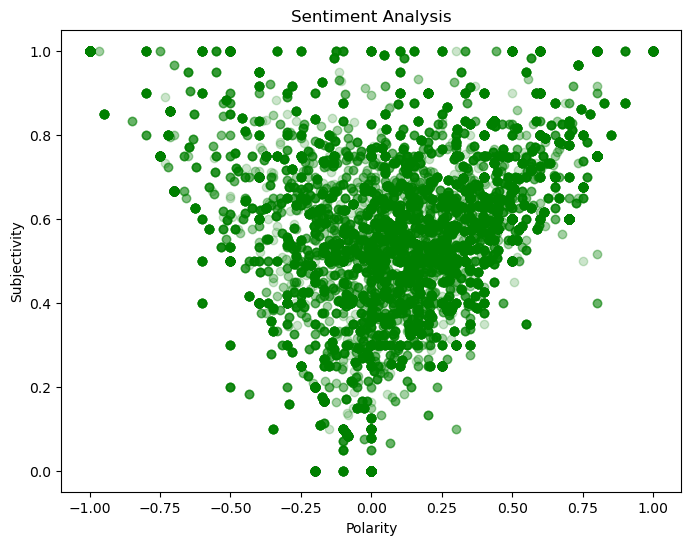

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(comment['polarity'], comment['subjectivity'], color='green', alpha=0.2)
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

sentiment vs dosage

In [149]:
bins = [0, 1,3,5, 10, 12, 20]
labels = [
    '0–1mg',
    '1–3mg',
    '3–5mg',
    '5–10mg',
    '10–12mg',
    '12–20mg'
]
comment['DoseGroup'] = pd.cut(comment['Dosage_mg'], bins=bins, labels=labels)

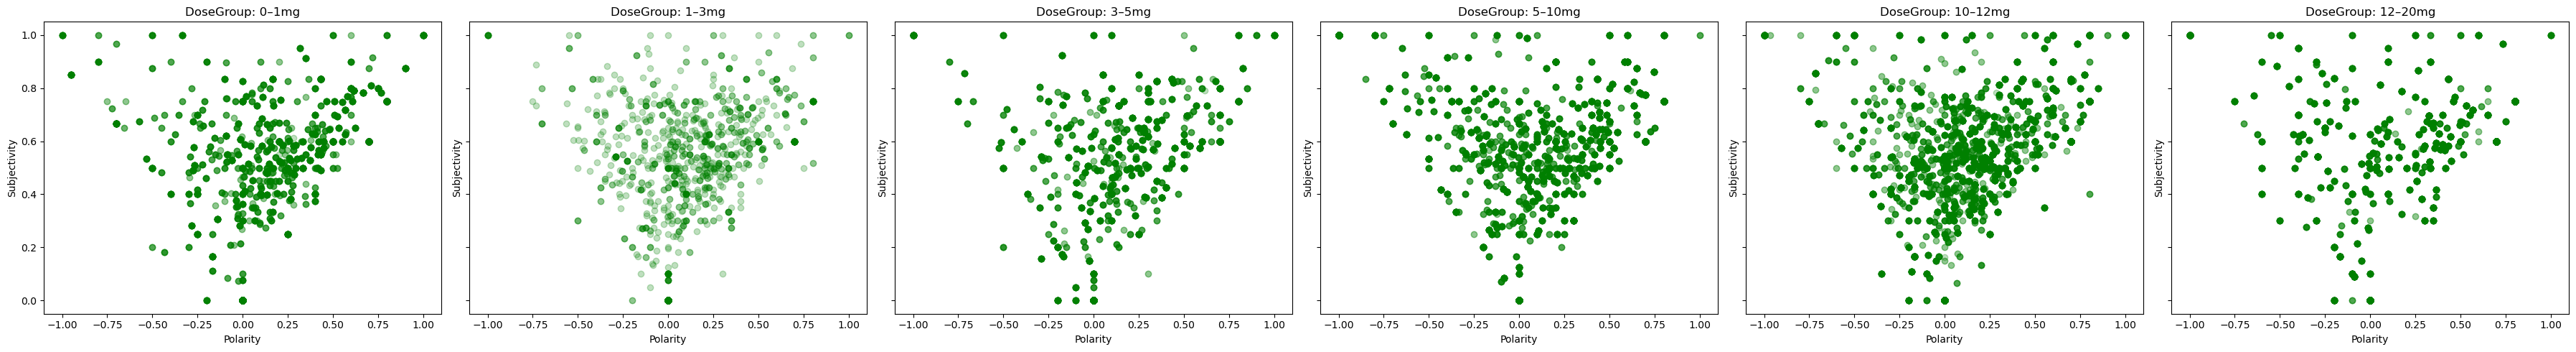

In [150]:
dose_groups = comment['DoseGroup'].unique()

fig, axes = plt.subplots(1, len(dose_groups), figsize=(6 * len(dose_groups), 5), sharex=True, sharey=True)

for ax, group in zip(axes, dose_groups):
    group_df = comment[comment['DoseGroup'] == group]

    ax.scatter(
        group_df['polarity'], 
        group_df['subjectivity'],
        alpha=0.25, 
        color='green'
    )

    ax.set_title(f"DoseGroup: {group}")
    ax.set_xlabel("Polarity")
    ax.set_ylabel("Subjectivity")    

plt.tight_layout()
plt.show()

User sentiment distribution almost same across all dosage groups.
User reviews of melatonin are not dose-driven.

sentiment vs brand

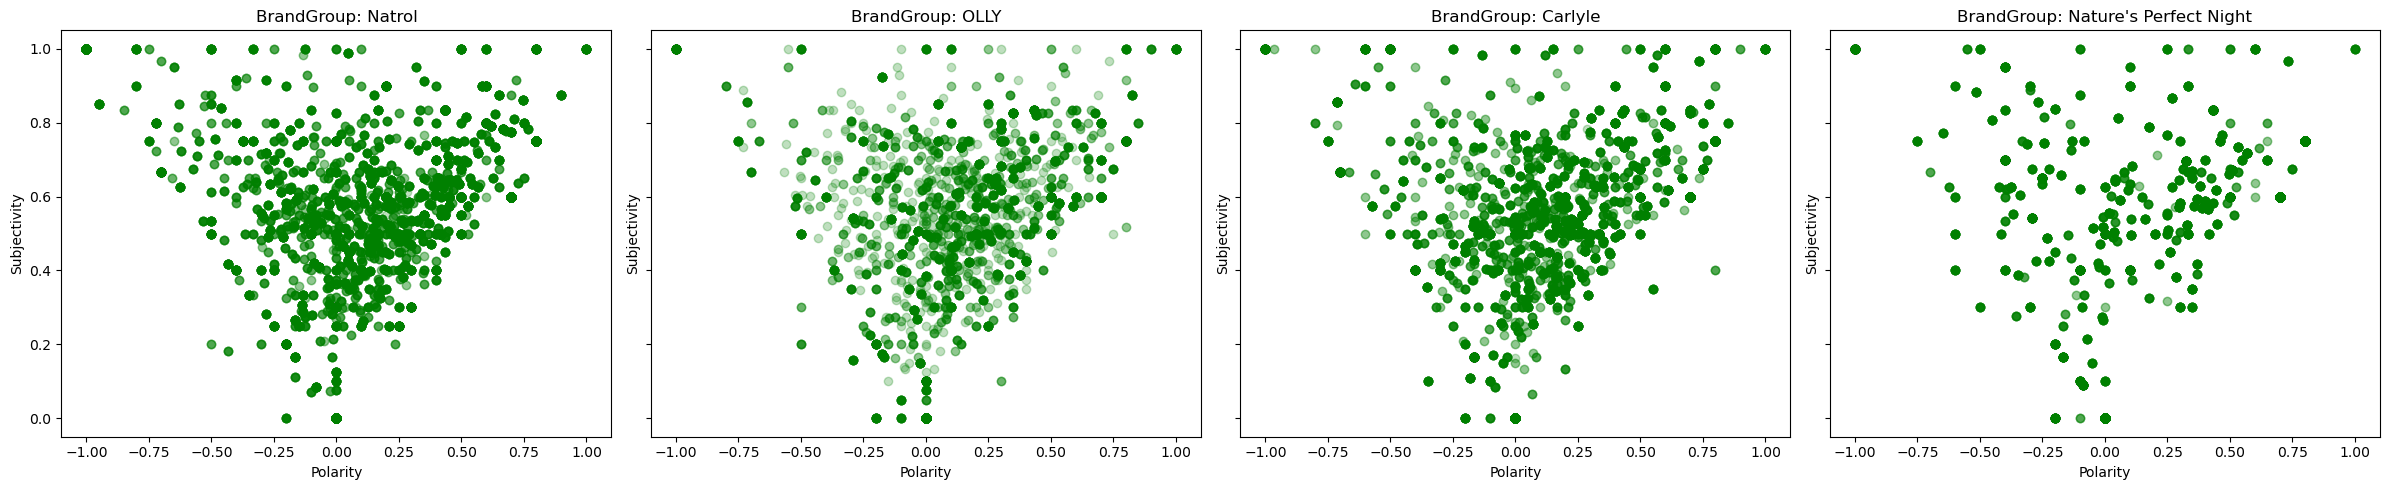

In [153]:
brand_groups = comment['Brand'].unique()

fig, axes = plt.subplots(1, len(brand_groups), figsize=(6 * len(brand_groups), 5), sharex=True, sharey=True)

for ax, group in zip(axes, brand_groups):
    group_df = comment[comment['Brand'] == group]

    ax.scatter(
        group_df['polarity'], 
        group_df['subjectivity'],
        alpha=0.25, 
        color='green'
    )

    ax.set_title(f"BrandGroup: {group}")
    ax.set_xlabel("Polarity")
    ax.set_ylabel("Subjectivity")    

plt.tight_layout()
plt.show()

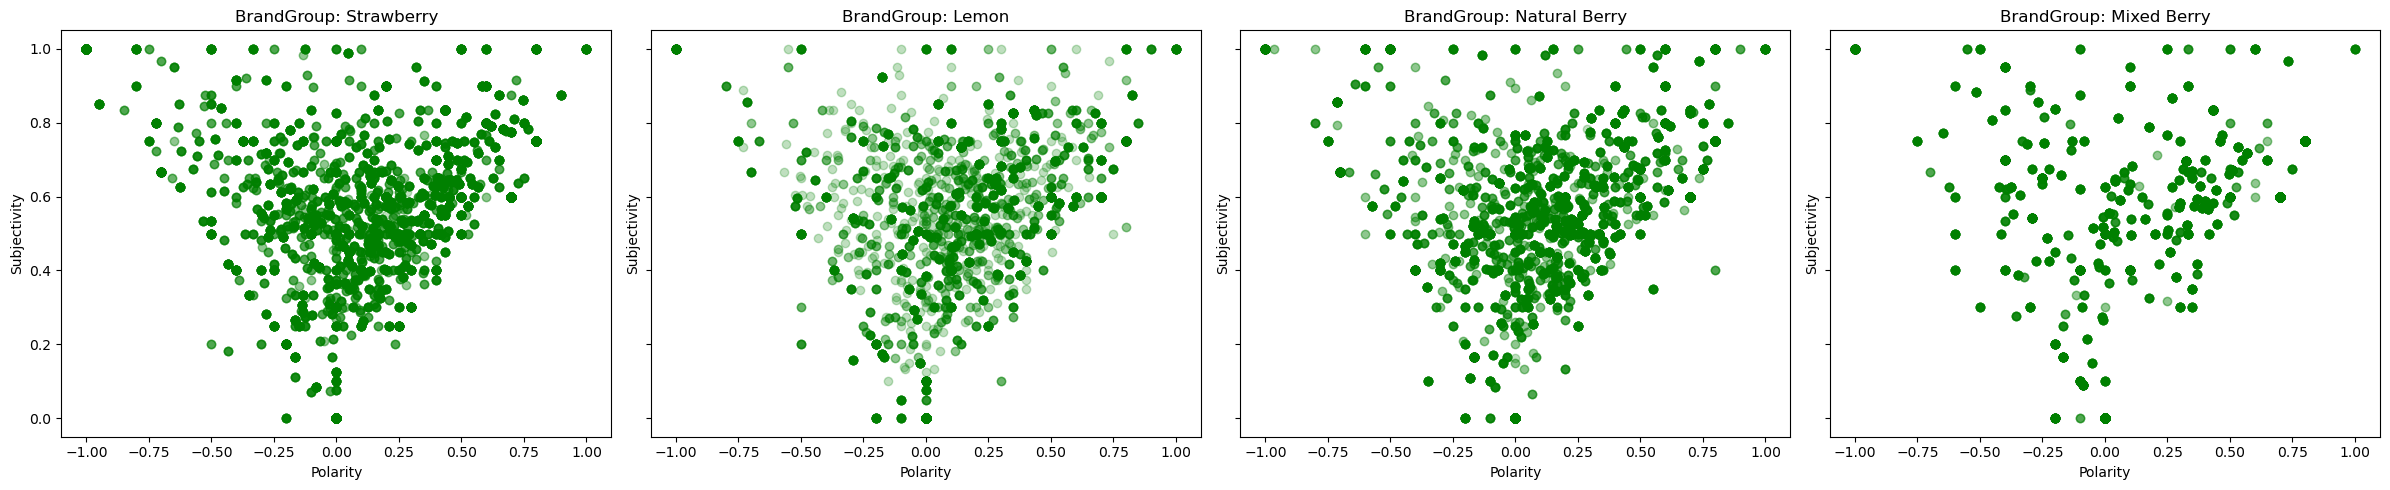

In [154]:
flavor_groups = comment['Flavor'].unique()

fig, axes = plt.subplots(1, len(flavor_groups), figsize=(6 * len(flavor_groups), 5), sharex=True, sharey=True)

for ax, group in zip(axes, flavor_groups):
    group_df = comment[comment['Flavor'] == group]

    ax.scatter(
        group_df['polarity'], 
        group_df['subjectivity'],
        alpha=0.25, 
        color='green'
    )

    ax.set_title(f"BrandGroup: {group}")
    ax.set_xlabel("Polarity")
    ax.set_ylabel("Subjectivity")    

plt.tight_layout()
plt.show()

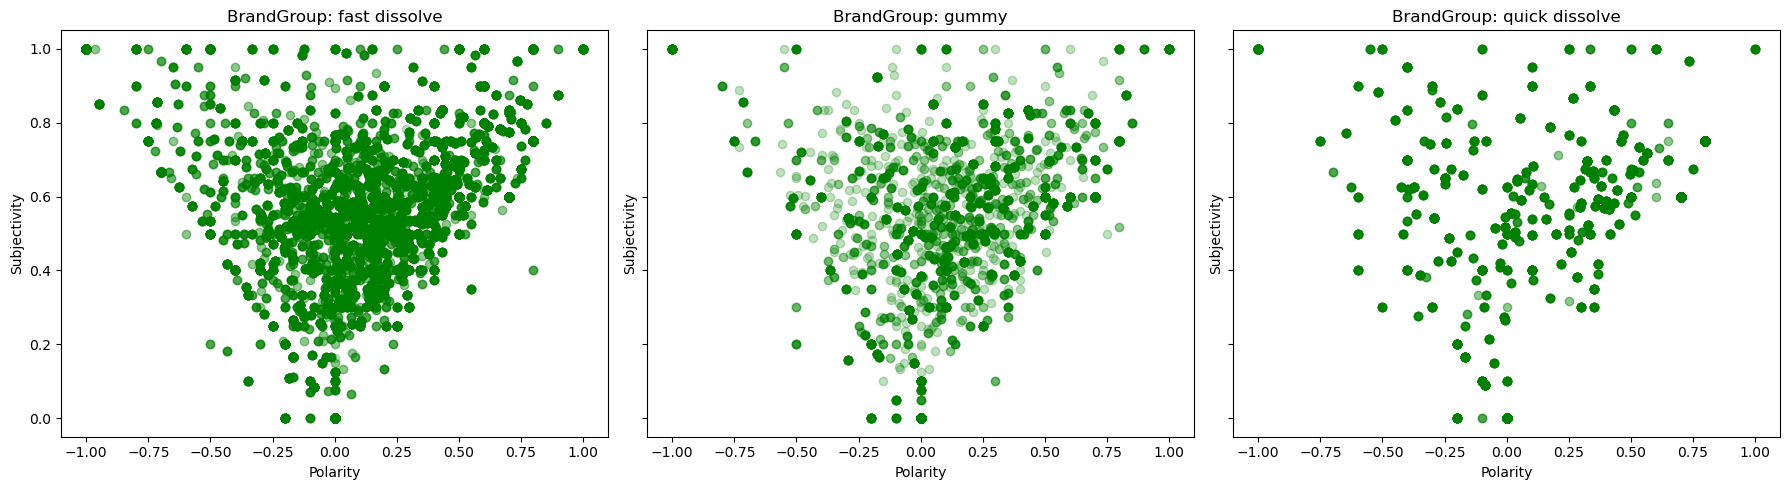

In [155]:
form_groups = comment['Form'].unique()

fig, axes = plt.subplots(1, len(form_groups), figsize=(6 * len(form_groups), 5), sharex=True, sharey=True)

for ax, group in zip(axes, form_groups):
    group_df = comment[comment['Form'] == group]

    ax.scatter(
        group_df['polarity'], 
        group_df['subjectivity'],
        alpha=0.25, 
        color='green'
    )

    ax.set_title(f"BrandGroup: {group}")
    ax.set_xlabel("Polarity")
    ax.set_ylabel("Subjectivity")    

plt.tight_layout()
plt.show()

User sentiment distribution almost same across all brand groups. 

#### what are people expacting for buying different dosage? what they praise? complain?

group by dosage

spaCy

In [159]:
import spacy
from spacy.matcher import PhraseMatcher

In [160]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

topic_phrases: possible expectations from word freq

In [162]:
topic_phrases = {

    "fall_asleep_speed": [
        "fall asleep fast", "fall asleep faster", "fell asleep fast",
        "asleep quickly", "asleep fast", "asleep within minutes",
        "fast acting", "worked quickly", "works quickly",
        "helps me fall asleep", "helped me fall asleep",
        "put me to sleep", "drift off quickly", "easy to fall asleep",
        "30 minutes", "within 30 minutes",
        "hard time falling asleep", "hard time asleep",
        "takes a while to fall asleep", "takes forever",
        "didn't help me fall asleep", "did not help me fall asleep",
        "trouble falling asleep", "still can't fall asleep",
        "could not fall asleep"
    ],

    "stay_asleep?": [
        "stay asleep", "stays asleep", "sleep through the night",
        "slept through the night", "through the night", "all night",
        "entire night", "sleep all night",
        "wake up in the middle of the night", "wake up at night",
        "waking up at night", "woke up at night",
        "waking up during the night", "wake up again",
        "wake multiple times", "kept waking up",
        "middle of the night", "middle night wake"
    ],


    "side_effects": [
        "groggy", "grogginess", "morning groggy",
        "hangover", "hungover",
        "nightmare", "nightmares", "vivid dreams",
        "weird dreams", "strange dreams",
        "headache", "headaches",
        "dizzy", "dizziness", "lightheaded",
        "nausea", "nauseous", "sick to stomach",
        "heart racing", "palpitations",
        "dry mouth", "dry throat",
        "upset stomach", "stomach ache",
        "felt weird", "feel weird",
        "next day groggy",
        "aftertaste", "bad aftertaste"
        "no side effects", "no groggy", "not groggy",
        "no headache", "no dizziness", "no nausea",
        "no hangover", "doesn't make me groggy",
        "didn't feel weird", "no bad dreams",
        "didn't give me nightmares"
    ],


    "effective?": [
        "works great", "works well", "works perfectly",
        "really works", "super effective",
        "helped me sleep", "helps me sleep",
        "effective", "very effective",
        "works amazing", "works wonders",
        "didn't work", "doesn't work", "did not work",
        "not effective", "not very effective",
        "no effect", "no noticeable effect",
        "didn't help", "does not help", "did not help",
        "stopped working", "stop working"
    ],
    


    "taste": [
        "taste good", "tastes good", "good taste",
        "great taste", "flavor is good", "good flavor",
        "berry flavor", "strawberry", "cherry", "orange",
        "natural berry", "sweet", "tastes great",
        "taste bad", "tastes bad", "bad taste",
        "flavor is bad", "bitter", "chalky",
        "too sweet", "not sweet", "bad flavor",
        "aftertaste", "strong aftertaste"
    ],
}


PhraseMatcher

In [164]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

for label, phrases in topic_phrases.items():
    patterns = [nlp.make_doc(p) for p in phrases]
    matcher.add(label, patterns)

spaCy

In [166]:
texts = comment['ReviewContent'].copy().fillna("").astype(str).tolist()
docs = list(nlp.pipe(texts, batch_size=1000)) 

Group by dosage and make a proportional table

In [168]:
topic_flags = {label: [] for label in topic_phrases.keys()}

for doc in docs:
    matches = matcher(doc)
    labels_in_doc = {nlp.vocab[match_id].text for match_id, start, end in matches}
    for label in topic_phrases.keys():
        topic_flags[label].append(1 if label in labels_in_doc else 0)

for label, values in topic_flags.items():
    comment[label] = values

In [169]:
topic_cols = list(topic_phrases.keys())

dose_topic_rate = (
    comment
    .groupby('DoseGroup')[topic_cols]
    .mean()
    .reset_index()
)

print(dose_topic_rate)

  DoseGroup  fall_asleep_speed  stay_asleep?  side_effects  effective?  \
0     0–1mg           0.066926      0.035176      0.133166    0.071037   
1     1–3mg           0.073056      0.039277      0.170463    0.055774   
2     3–5mg           0.041194      0.057394      0.062023    0.043740   
3    5–10mg           0.031568      0.031300      0.064473    0.060460   
4   10–12mg           0.058666      0.036532      0.104115    0.068765   
5   12–20mg           0.044850      0.022045      0.101292    0.061574   

      taste  
0  0.155094  
1  0.111548  
2  0.073131  
3  0.186731  
4  0.130225  
5  0.142721  


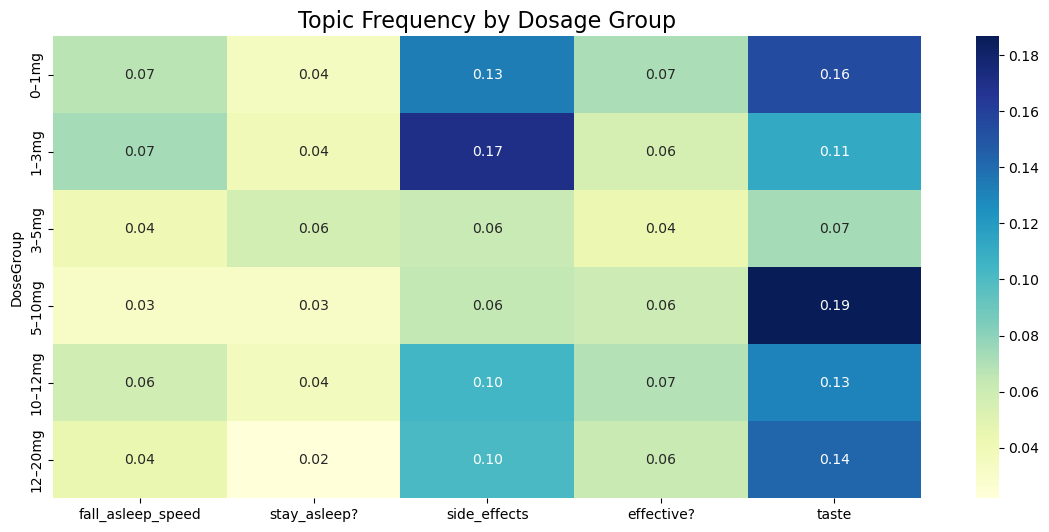

In [170]:
topic_cols = [
    'fall_asleep_speed','stay_asleep?','side_effects','effective?','taste'
]

plt.figure(figsize=(14,6))
sns.heatmap( 
    dose_topic_rate.set_index('DoseGroup')[topic_cols],
    annot=True, cmap='YlGnBu', fmt=".2f"
)
plt.title("Topic Frequency by Dosage Group", fontsize=16)
plt.show()

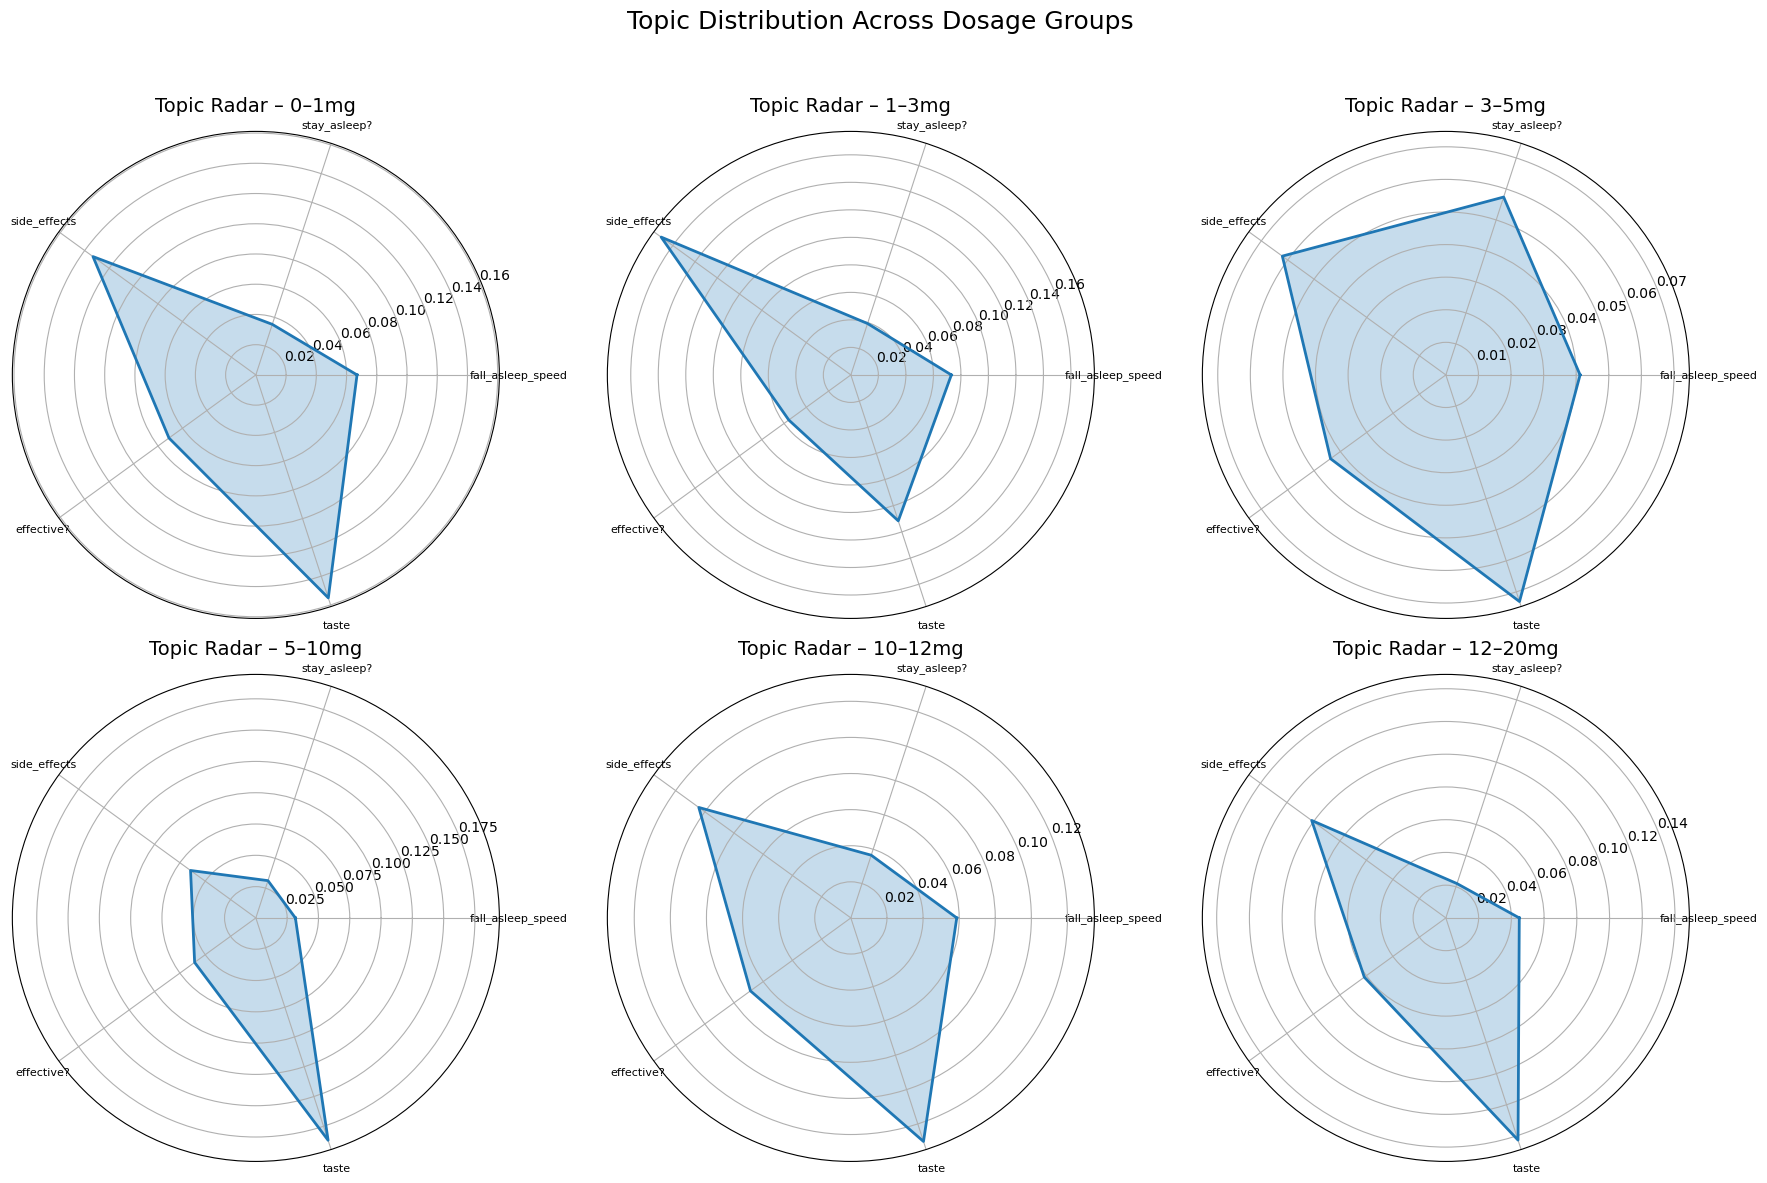

In [171]:
labels = topic_cols
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()
dose_groups = dose_topic_rate['DoseGroup'].astype(str).tolist()
for i, dose in enumerate(dose_groups):
    ax = axes[i]
    values = dose_topic_rate[dose_topic_rate['DoseGroup'] == dose][topic_cols].values.flatten()
    
    values = np.concatenate((values, [values[0]]))
    angles = np.linspace(0, 2 * np.pi, len(topic_cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180 / np.pi, topic_cols, fontsize=8)
    ax.set_title(f"Topic Radar – {dose}", fontsize=14)

plt.suptitle("Topic Distribution Across Dosage Groups", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

conclusion:
1. for different dosage, people are expecting different factors
2. and most of them care about how product taste and side effect

postive

In [174]:
topic_phrases = {

    "fall_asleep_fast": [
        "fall asleep fast", "fall asleep faster", "fell asleep fast",
        "asleep quickly", "asleep fast", "asleep within minutes",
        "fast acting", "worked quickly", "works quickly",
        "helps me fall asleep", "helped me fall asleep",
        "put me to sleep", "drift off quickly", "easy to fall asleep",
        "30 minutes", "within 30 minutes"
    ],

    "stay_asleep": [
        "stay asleep", "stays asleep", "sleep through the night",
        "slept through the night", "through the night", "all night",
        "entire night", "sleep all night"
    ],

    "side_effects_no": [
        "no side effects", "no groggy", "not groggy",
        "no headache", "no dizziness", "no nausea",
        "no hangover", "doesn't make me groggy",
        "didn't feel weird", "no bad dreams",
        "didn't give me nightmares"
    ],

    "effective_yes": [
        "works great", "works well", "works perfectly",
        "really works", "super effective",
        "helped me sleep", "helps me sleep",
        "effective", "very effective",
        "works amazing", "works wonders"
    ],

    "taste_good": [
        "taste good", "tastes good", "good taste",
        "great taste", "flavor is good", "good flavor",
        "berry flavor", "strawberry", "cherry", "orange",
        "natural berry", "sweet", "tastes great"
    ],
}

In [175]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

for label, phrases in topic_phrases.items():
    patterns = [nlp.make_doc(p) for p in phrases]
    matcher.add(label, patterns)

In [176]:
texts = comment['ReviewContent'].copy().fillna("").astype(str).tolist()
docs = list(nlp.pipe(texts, batch_size=1000))

In [177]:
topic_flags = {label: [] for label in topic_phrases.keys()}

for doc in docs:
    matches = matcher(doc)
    labels_in_doc = {nlp.vocab[match_id].text for match_id, start, end in matches}
    for label in topic_phrases.keys():
        topic_flags[label].append(1 if label in labels_in_doc else 0)

for label, values in topic_flags.items():
    comment[label] = values

In [178]:
topic_cols = list(topic_phrases.keys())

dose_topic_rate = (
    comment
    .groupby('DoseGroup')[topic_cols]
    .mean()
    .reset_index()
)

print(dose_topic_rate)

  DoseGroup  fall_asleep_fast  stay_asleep  side_effects_no  effective_yes  \
0     0–1mg          0.064641     0.035176              0.0       0.071037   
1     1–3mg          0.065200     0.039277              0.0       0.054988   
2     3–5mg          0.037491     0.057394              0.0       0.039111   
3    5–10mg          0.028892     0.031300              0.0       0.059925   
4   10–12mg          0.056517     0.036532              0.0       0.068336   
5   12–20mg          0.036108     0.022045              0.0       0.061574   

   taste_good  
0    0.135222  
1    0.091909  
2    0.061560  
3    0.117978  
4    0.108520  
5    0.098632  


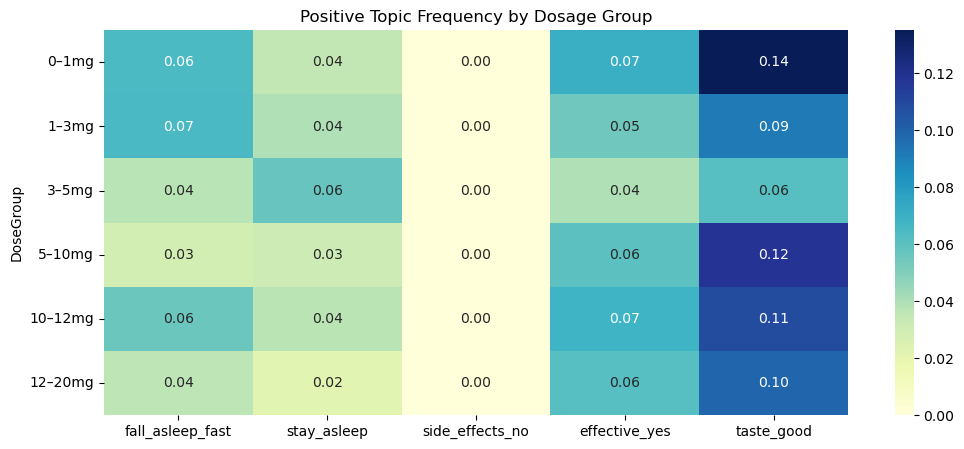

In [179]:
positive_topic_cols = [
    'fall_asleep_fast', 'stay_asleep', 
    'side_effects_no', 'effective_yes', 'taste_good'
]

plt.figure(figsize=(12,5))
sns.heatmap(
    dose_topic_rate.set_index('DoseGroup')[positive_topic_cols],
    annot=True, cmap='YlGnBu', fmt=".2f"
)
plt.title("Positive Topic Frequency by Dosage Group")
plt.show()

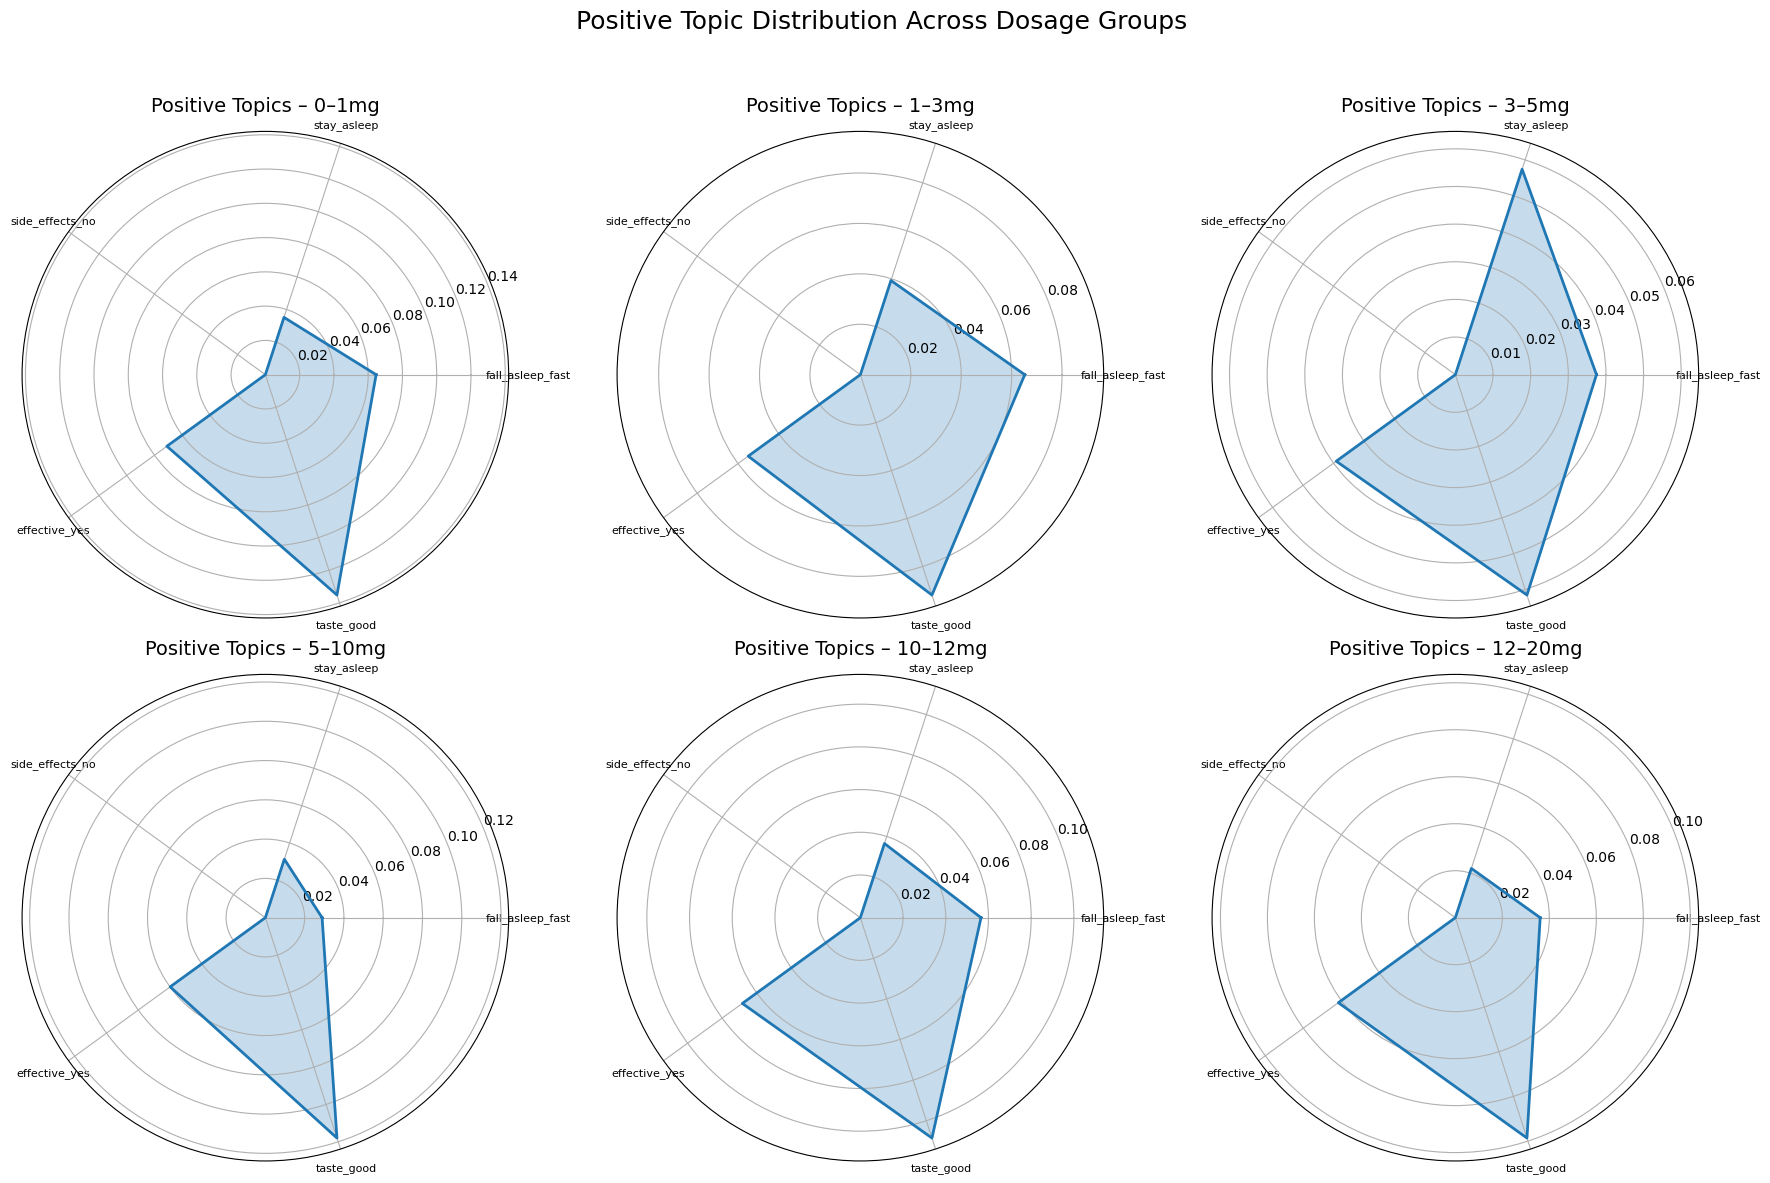

In [180]:
labels = positive_topic_cols
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

dose_groups = dose_topic_rate['DoseGroup'].astype(str).tolist()

for i, dose in enumerate(dose_groups):
    ax = axes[i]
    values = dose_topic_rate.loc[dose_topic_rate['DoseGroup'] == dose, positive_topic_cols].values.flatten()

    values = np.concatenate((values, [values[0]]))
    angles = np.linspace(0, 2 * np.pi, len(positive_topic_cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=8)
    ax.set_title(f"Positive Topics – {dose}", fontsize=14)

plt.suptitle("Positive Topic Distribution Across Dosage Groups", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


conclusion:
1. for different dosage people praise about different effect
2. but most of them praise about taste

In [182]:
topic_phrases = {

    "fall_asleep_slow": [
        "hard time falling asleep", "hard time asleep",
        "takes a while to fall asleep", "takes forever",
        "didn't help me fall asleep", "did not help me fall asleep",
        "trouble falling asleep", "still can't fall asleep",
        "could not fall asleep"
    ],

    "middle_night_wake": [
        "wake up in the middle of the night", "wake up at night",
        "waking up at night", "woke up at night",
        "waking up during the night", "wake up again",
        "wake multiple times", "kept waking up",
        "middle of the night", "middle night wake"
    ],

    "side_effects_yes": [
        "groggy", "grogginess", "morning groggy",
        "hangover", "hungover",
        "nightmare", "nightmares", "vivid dreams",
        "weird dreams", "strange dreams",
        "headache", "headaches",
        "dizzy", "dizziness", "lightheaded",
        "nausea", "nauseous", "sick to stomach",
        "heart racing", "palpitations",
        "dry mouth", "dry throat",
        "upset stomach", "stomach ache",
        "felt weird", "feel weird",
        "next day groggy",
        "aftertaste", "bad aftertaste"
    ],

    "effective_no": [
        "didn't work", "doesn't work", "did not work",
        "not effective", "not very effective",
        "no effect", "no noticeable effect",
        "didn't help", "does not help", "did not help",
        "stopped working", "stop working"
    ],

    "taste_bad": [
        "taste bad", "tastes bad", "bad taste",
        "flavor is bad", "bitter", "chalky",
        "too sweet", "not sweet", "bad flavor",
        "aftertaste", "strong aftertaste"
    ],
}


In [183]:
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

for label, phrases in topic_phrases.items():
    patterns = [nlp.make_doc(p) for p in phrases]
    matcher.add(label, patterns)

In [184]:
texts = comment['ReviewContent'].copy().fillna("").astype(str).tolist()
docs = list(nlp.pipe(texts, batch_size=1000))

In [185]:
topic_flags = {label: [] for label in topic_phrases.keys()}

for doc in docs:
    matches = matcher(doc)
    labels_in_doc = {nlp.vocab[match_id].text for match_id, start, end in matches}
    for label in topic_phrases.keys():
        topic_flags[label].append(1 if label in labels_in_doc else 0)

for label, values in topic_flags.items():
    comment[label] = values

In [186]:
topic_cols = list(topic_phrases.keys())

dose_topic_rate = (
    comment
    .groupby('DoseGroup')[topic_cols]
    .mean()
    .reset_index()
)

print(dose_topic_rate)

  DoseGroup  fall_asleep_slow  middle_night_wake  side_effects_yes  \
0     0–1mg          0.002284                0.0          0.133166   
1     1–3mg          0.013354                0.0          0.170463   
2     3–5mg          0.003703                0.0          0.062023   
3    5–10mg          0.003745                0.0          0.064473   
4   10–12mg          0.004083                0.0          0.104115   
5   12–20mg          0.008742                0.0          0.101292   

   effective_no  taste_bad  
0      0.000000   0.029466  
1      0.000786   0.021995  
2      0.004629   0.011571  
3      0.000535   0.090423  
4      0.000430   0.031374  
5      0.000000   0.050551  


In [187]:
negative_topic_cols = [
    'fall_asleep_slow', 'middle_night_wake',
    'side_effects_yes', 'effective_no', 'taste_bad'
]

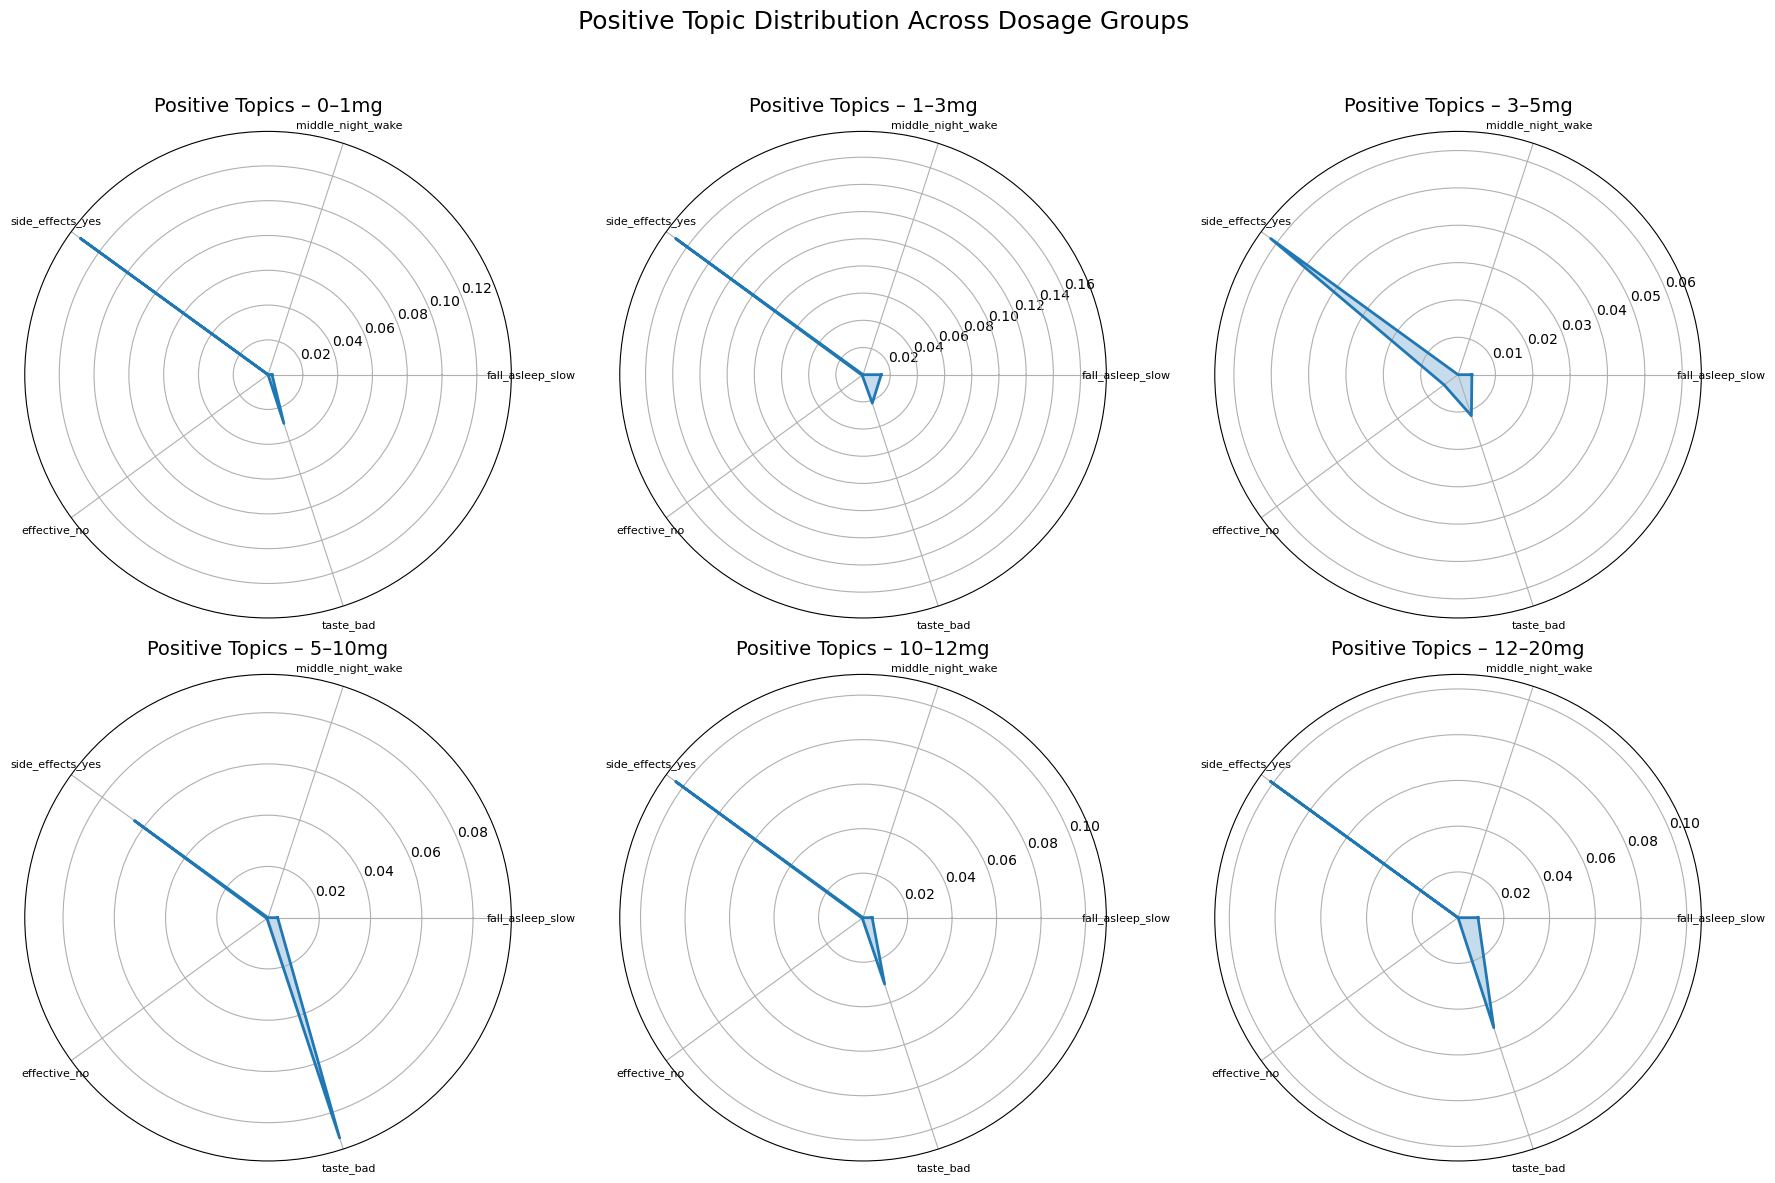

In [188]:
labels = negative_topic_cols
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

dose_groups = dose_topic_rate['DoseGroup'].astype(str).tolist()

for i, dose in enumerate(dose_groups):
    ax = axes[i]
    values = dose_topic_rate.loc[dose_topic_rate['DoseGroup'] == dose, negative_topic_cols].values.flatten()

    values = np.concatenate((values, [values[0]]))
    angles = np.linspace(0, 2 * np.pi, len(negative_topic_cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels, fontsize=8)
    ax.set_title(f"Positive Topics – {dose}", fontsize=14)

plt.suptitle("Positive Topic Distribution Across Dosage Groups", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


conclusion:
1. for different dosage people complain for different reason
2. most of them complain about side effect

Now able to answer:
1. Do different dosages affect market feedback?
   
   dosage does not meaningfully affect consumer feedback(review score and sentiment distribution).
3. Is the feedback influenced more by other factors?

   not the product attributes, but their expectations
5. What do people expect for each dosage?

   they expect: fall asleep fast, no middle wake up, taste good, no side effect, efficiency
7. What are they praise\complain about for each dosage?

   different dosage, they praise\complain about different things.
   but generally they praise about good taste and complain about side effect.